### Notebook notes
- This notebook prepares figures and tables for the MASLD multitarget study.
- Non-essential editorial guidance has been removed; see manuscript for placement details.
- Data paths updated to Supporting_Information/* structure.


In [ ]:
Figures and tables planned:
- Figure 1. Workflow of the multi-target screening pipeline for MASLD.
- Figure 2. Predictive performance (ROC-AUC) of target-specific models.
- Figure 3. Chemical space dendrogram (Tanimoto/Morgan).
- Figure 4. Target × compound probabilistic heat-map.
- Figure 5. PBPK concentration–time profiles (three product concepts).
- Figure 6. Physicochemical diversity of key actives.

Tables:
- Table 1. MASLD targets and weighted contributions to total activity.
- Table 2. Model performance metrics (with calibration).
- Table 3. Cluster-level diversity metrics.
- Table 4. Composition of the three product concepts.
- Table 5. PBPK-derived pharmacokinetic coverage.
- Table 6. Predicted stability and sensory profiles.


# Table 1. Panel of MASLD-relevant targets and weighted contributions to total activity.

In [ ]:
# Target weights are stored in concordance.json (Kendall W-derived)
import json

concordance_path = "Supporting_Information/Configs/concordance.json"
with open(concordance_path, "r", encoding="utf-8") as f:
    concordance_data = json.load(f)

# Per-target weights
per_target_w = concordance_data["per_target_w"]
per_target_w


{'CHEMBL1947': 0.8818058332206768,
 'CHEMBL2047': 0.7364347324506687,
 'CHEMBL2083': 0.874967864975923,
 'CHEMBL235': 0.9223754142007221,
 'CHEMBL239': 0.9244228234861481,
 'CHEMBL3247': 0.9177150370737474,
 'CHEMBL3351': 0.9173476592056968,
 'CHEMBL4158': 0.5580062710565679,
 'CHEMBL5080': 0.678026142615852,
 'CHEMBL5853': 0.8786236072464438}

In [ ]:
# Map CHEMBL IDs to target names and biological roles
target_mapping = {
    "CHEMBL2047": ("FXR", "Bile acid and lipid metabolism regulator"),
    "CHEMBL239": ("PPAR-α", "Regulation of fatty acid oxidation, lipoprotein metabolism"),
    "CHEMBL235": ("PPAR-γ", "Adipogenesis, glucose and lipid metabolism"),
    "CHEMBL1947": ("THR-β", "Regulation of basal metabolic rate and lipid metabolism"),
    "CHEMBL3351": ("ACC1", "Fatty acid synthesis rate-limiting enzyme"),
    "CHEMBL5853": ("FASN", "Catalyzes synthesis of long-chain fatty acids"),
    "CHEMBL4158": ("DGAT2", "Triacylglycerol synthesis"),
    "CHEMBL3247": ("HMGCR", "Cholesterol biosynthesis rate-limiting enzyme"),
    "CHEMBL5080": ("LIPG", "Endothelial lipase, HDL metabolism"),
    "CHEMBL2083": ("FABP4", "Intracellular fatty acid transport protein")
}

# Build DataFrame for the table
table1_df = pd.DataFrame([
    {
        "Target": target_mapping[tid][0],
        "Biological Role": target_mapping[tid][1],
        "Weight in TA_weighted": round(weight, 3)
    }
    for tid, weight in per_target_w.items()
])

table1_df


,Target,Biological Role,Weight in TA_weighted
0,THR-β,Regulation of basal metabolic rate and lipid m...,0.882
1,FXR,Bile acid and lipid metabolism regulator,0.736
2,FABP4,Intracellular fatty acid transport protein,0.875
3,PPAR-γ,"Adipogenesis, glucose and lipid metabolism",0.922
4,PPAR-α,"Regulation of fatty acid oxidation, lipoprotei...",0.924
5,HMGCR,Cholesterol biosynthesis rate-limiting enzyme,0.918
6,ACC1,Fatty acid synthesis rate-limiting enzyme,0.917
7,DGAT2,Triacylglycerol synthesis,0.558
8,LIPG,"Endothelial lipase, HDL metabolism",0.678
9,FASN,Catalyzes synthesis of long-chain fatty acids,0.879


# Table 2 — Model performance metrics

In [ ]:
import pandas as pd

aps = pd.read_csv("Supporting_Information/Metrics/advanced_pipeline_summary.csv")

target_mapping = {
    "CHEMBL2047": "FXR",
    "CHEMBL239": "PPAR-α",
    "CHEMBL235": "PPAR-γ",
    "CHEMBL1947": "THR-β",
    "CHEMBL3351": "ACC1",
    "CHEMBL5853": "FASN",
    "CHEMBL4158": "DGAT2",
    "CHEMBL3247": "HMGCR",
    "CHEMBL5080": "LIPG",
    "CHEMBL2083": "FABP4"
}

cols = [
    "target_id","cv_auc_mean","cv_auc_std","test_roc_auc","test_pr_auc",
    "test_accuracy","test_balanced_accuracy","test_precision","test_recall",
    "test_f1","test_mcc","calibration","t_opt"
]

df2 = aps[cols].copy()
df2["Target"] = df2["target_id"].map(target_mapping)
# Reorder and round
df2 = df2[["Target","cv_auc_mean","cv_auc_std","test_roc_auc","test_pr_auc",
           "test_accuracy","test_balanced_accuracy","test_precision","test_recall",
           "test_f1","test_mcc","calibration","t_opt"]].round(3)

# import caas_jupyter_tools as cj
# cj.display_dataframe_to_user("Table 2 — Model performance metrics (from advanced_pipeline_summary.csv)", df2)

df2


,Target,cv_auc_mean,cv_auc_std,test_roc_auc,test_pr_auc,test_accuracy,test_balanced_accuracy,test_precision,test_recall,test_f1,test_mcc,calibration,t_opt
0,FABP4,0.916,0.0,0.956,0.938,0.875,0.873,0.857,0.857,0.857,0.746,{'note': 'bases_calibrated'},0.497
1,THR-β,0.899,0.0,0.930,0.922,0.767,0.783,1.000,0.565,0.722,0.614,{'note': 'bases_calibrated'},0.500
2,HMGCR,0.850,0.0,0.882,0.944,0.851,0.781,0.899,0.909,0.904,0.571,{'note': 'bases_calibrated'},0.507
3,LIPG,0.849,0.0,0.872,0.974,0.902,0.746,0.948,0.942,0.945,0.482,{'note': 'bases_calibrated'},0.917
4,FASN,0.776,0.0,0.843,0.934,0.833,0.727,0.878,0.915,0.896,0.483,{'note': 'bases_calibrated'},0.752
5,PPAR-α,0.812,0.0,0.821,0.745,0.758,0.757,0.757,0.726,0.741,0.515,{'note': 'bases_calibrated'},0.467
6,ACC1,0.887,0.0,0.799,0.848,0.694,0.745,0.919,0.596,0.723,0.464,{'note': 'bases_calibrated'},0.625
7,PPAR-γ,0.832,0.0,0.774,0.739,0.715,0.709,0.786,0.557,0.652,0.440,{'note': 'bases_calibrated'},0.708
8,FXR,0.771,0.0,0.765,0.535,0.750,0.540,0.750,0.091,0.162,0.200,{'note': 'bases_calibrated'},0.361
9,DGAT2,0.750,0.0,0.758,0.450,0.950,0.778,0.583,0.583,0.583,0.557,{'note': 'bases_calibrated'},0.257


# Figure 2. Predictive performance (test ROC-AUC) for MASLD-relevant targets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load ROC metrics
metrics_path = "Supporting_Information/Metrics/metrics_summary.csv"
metrics_df = pd.read_csv(metrics_path)

metrics_df.head()


,target_id,cv_auc_mean,test_roc_auc,pr_auc,roc_auc_ci,pr_auc_ci
0,CHEMBL2083,0.915993,0.955908,NaN,"(nan, nan)","(nan, nan)"
1,CHEMBL1947,0.899139,0.930435,NaN,"(nan, nan)","(nan, nan)"
2,CHEMBL3247,0.850451,0.882430,NaN,"(nan, nan)","(nan, nan)"
3,CHEMBL5080,0.849273,0.871965,NaN,"(nan, nan)","(nan, nan)"
4,CHEMBL5853,0.775984,0.842881,NaN,"(nan, nan)","(nan, nan)"


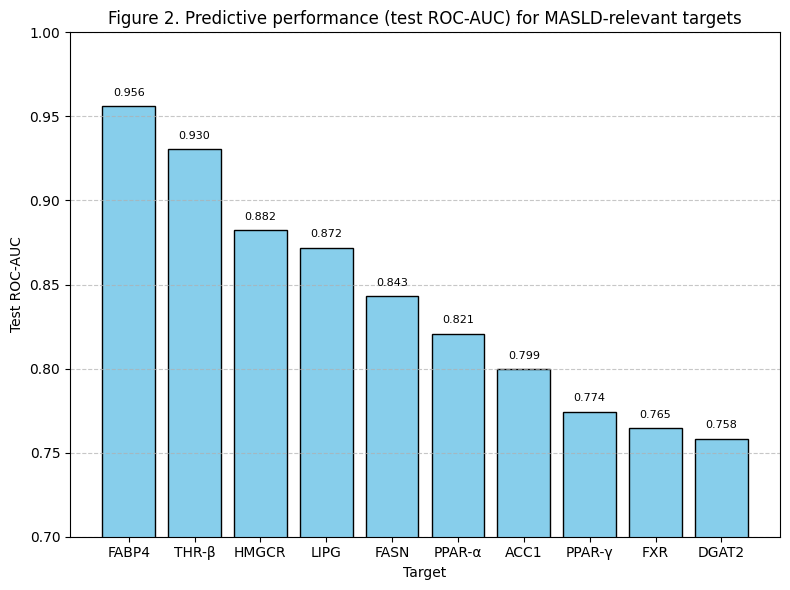

In [ ]:
# Map CHEMBL IDs to target names
target_mapping = {
    "CHEMBL2047": "FXR",
    "CHEMBL239": "PPAR-α",
    "CHEMBL235": "PPAR-γ",
    "CHEMBL1947": "THR-β",
    "CHEMBL3351": "ACC1",
    "CHEMBL5853": "FASN",
    "CHEMBL4158": "DGAT2",
    "CHEMBL3247": "HMGCR",
    "CHEMBL5080": "LIPG",
    "CHEMBL2083": "FABP4"
}

# Add target names to DataFrame
metrics_df["Target"] = metrics_df["target_id"].map(target_mapping)

# Sort by test_roc_auc
metrics_sorted = metrics_df.sort_values("test_roc_auc", ascending=False)

# Build Figure 2
plt.figure(figsize=(8,6))
bars = plt.bar(metrics_sorted["Target"], metrics_sorted["test_roc_auc"], color="skyblue", edgecolor="black")
plt.ylim(0.7, 1.0)
plt.ylabel("Test ROC-AUC")
plt.xlabel("Target")
plt.title("Figure 2. Predictive performance (test ROC-AUC) for MASLD-relevant targets")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add bar labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.3f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()


# Figure 3. Chemical space dendrogram (Tanimoto / Morgan r=2, nBits=2048)

In [ ]:
# Re-run loading now that we see ranked_hits.csv exists
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import BulkTanimotoSimilarity
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

ranked = pd.read_csv("Supporting_Information/Datasets/ranked_hits.csv")
ranked.head(1), ranked.columns.tolist()


(   orig_idx               Name  \
 0         0  Glycyrrhizic acid   
 
                                               SMILES  \
 0  CC1(C2CCC3(C(C2(CCC1OC4C(C(C(C(O4)C(=O)O)O)O)O...   
 
                                           SMILES_std  \
 0  CC1(C(=O)O)CCC2(C)CCC3(C)C(=CC(=O)C4C5(C)CCC(O...   
 
                       InChIKey  CHEMBL2047_prediction  CHEMBL2047_probability  \
 0  LPLVUJXQOOQHMX-UHFFFAOYSA-N                      0                0.237084   
 
   CHEMBL2047_label@0.5  CHEMBL239_prediction  CHEMBL239_probability  ...  \
 0           Не активен                     0                   0.25  ...   
 
   hts_red_flag          reg_sources  food_grade CAS   chrono_window  \
 0           no  FDA_GRAS,EFSA_NOVEL        GRAS NaN  morning_powder   
 
    suggested_form                                    murcko_scaffold  \
 0          powder  O=C1C=C2C3CCCCC3CCC2C2CCC3CC(OC4OCCCC4OC4CCCCO...   
 
    scaffold_id  moa_cluster_id moa_is_medoid  
 0            0               0 

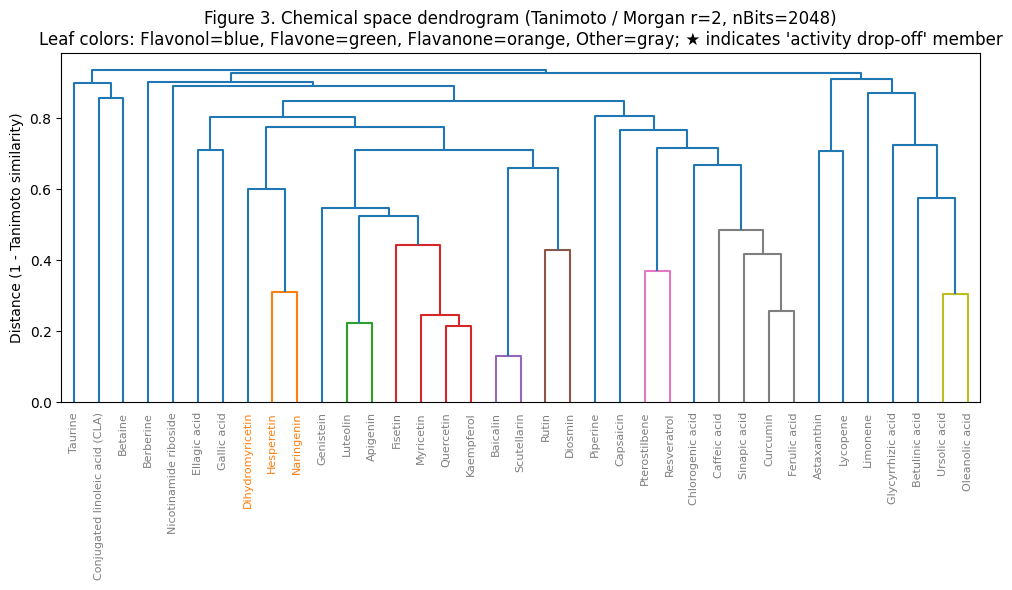

In [ ]:
# Build dendrogram on a manageable subset (e.g., top 50 by TA_weighted then main_score if present).
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import BulkTanimotoSimilarity
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# Determine sort keys
sort_keys = [c for c in ["TA_weighted","main_score","TA"] if c in ranked.columns]
if sort_keys:
    ranked_sorted = ranked.sort_values(sort_keys, ascending=False)
else:
    ranked_sorted = ranked.copy()

topN = min(60, len(ranked_sorted))
df = ranked_sorted.head(topN).reset_index(drop=True).copy()

# RDKit molecules from SMILES_std if present, else SMILES
smi_col = "SMILES_std" if "SMILES_std" in df.columns else "SMILES"
mols = []
names = []
valid_idx = []
for i, row in df.iterrows():
    m = Chem.MolFromSmiles(row[smi_col])
    if m is not None:
        mols.append(m)
        names.append(row["Name"] if "Name" in df.columns else f"Mol{i+1}")
        valid_idx.append(i)
df = df.iloc[valid_idx].reset_index(drop=True)

# Fingerprints
fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in mols]

# Distance matrix
n = len(fps)
sim_mat = np.zeros((n,n), dtype=float)
for i in range(n):
    sim_mat[i,:] = BulkTanimotoSimilarity(fps[i], fps)
dist_mat = 1.0 - sim_mat
dist_condensed = squareform(dist_mat, checks=False)
Z = linkage(dist_condensed, method="average")

# Chemical family classification using available columns if present, else substructure heuristics
families = None
if "chem_family" in df.columns:
    families = df["chem_family"].fillna("Other").tolist()
else:
    smarts_flavone = Chem.MolFromSmarts("O=C1C=COc2ccccc12")
    smarts_flavanone = Chem.MolFromSmarts("O=C1CCOc2ccccc12")
    smarts_flavonol = Chem.MolFromSmarts("c1(cc(O)ccc1O)C2=COC(=O)c3ccccc23")
    def family_of(m):
        fam = "Other"
        if smarts_flavonol and m.HasSubstructMatch(smarts_flavonol):
            fam = "Flavonol"
        elif smarts_flavone and m.HasSubstructMatch(smarts_flavone):
            fam = "Flavone"
        if smarts_flavanone and m.HasSubstructMatch(smarts_flavanone):
            fam = "Flavanone"
        return fam
    families = [family_of(m) for m in mols]

fam_colors = {"Flavonol": "tab:blue", "Flavone": "tab:green", "Flavanone": "tab:orange", "Other": "tab:gray"}

# Mark "break-gap" members, if gap_pairs.csv available
break_flags = [False]*len(df)
try:
    gp = pd.read_csv("Supporting_Information/Datasets/gap_pairs.csv")
    # Try mapping via InChIKey if present, else canonical SMILES
    # Build set of current InChIKeys
    ik_col = "InChIKey" if "InChIKey" in df.columns else None
    if ik_col and {"InChIKey_A","InChIKey_B"}.issubset(set(gp.columns)):
        gp_set = set(gp["InChIKey_A"].dropna().tolist() + gp["InChIKey_B"].dropna().tolist())
        idx_map = [df.loc[i, ik_col] in gp_set for i in range(len(df))]
        break_flags = idx_map
    else:
        # fallback to SMILES
        smi_cols = [c for c in gp.columns if c.lower().startswith("smiles")]
        if len(smi_cols) >= 2:
            gap_smis = set(gp[smi_cols[0]].dropna().tolist() + gp[smi_cols[1]].dropna().tolist())
            # canonicalize
            canon_gap = set()
            for s in gap_smis:
                m = Chem.MolFromSmiles(s)
                if m is not None:
                    canon_gap.add(Chem.MolToSmiles(m, canonical=True))
            canon_curr = [Chem.MolToSmiles(m, canonical=True) for m in mols]
            break_flags = [c in canon_gap for c in canon_curr]
except Exception as e:
    pass

# Plot dendrogram
plt.figure(figsize=(10,6))
D = dendrogram(Z, labels=names, leaf_rotation=90, leaf_font_size=8, color_threshold=0.5)
ax = plt.gca()
label_to_idx = {lbl: i for i, lbl in enumerate(names)}
for txt in ax.get_xmajorticklabels():
    lbl = txt.get_text()
    idx = label_to_idx.get(lbl, None)
    if idx is not None:
        txt.set_color(fam_colors.get(families[idx], "tab:gray"))
        if break_flags[idx]:
            ax.text(txt.get_position()[0], 0.02, "★", transform=ax.get_xaxis_transform(),
                    ha="center", va="bottom")
plt.title("Figure 3. Chemical space dendrogram (Tanimoto / Morgan r=2, nBits=2048)\n"
          "Leaf colors: Flavonol=blue, Flavone=green, Flavanone=orange, Other=gray; ★ indicates 'activity drop-off' member")
plt.ylabel("Distance (1 - Tanimoto similarity)")
plt.tight_layout()
plt.show()


# Table 4. Composition of the three product concepts

In [ ]:
import pandas as pd
import re

# Paths
ranked_path = "Supporting_Information/Datasets/ranked_hits.csv"
portfolio_path = "Supporting_Information/Datasets/portfolio.csv"

# Load data
ranked = pd.read_csv(ranked_path)
portfolio = pd.read_csv(portfolio_path)

# Identify probability columns per target (CHEMBLxxxx_probability)
prob_cols = [c for c in ranked.columns if c.endswith("_probability")]
target_ids = [c.replace("_probability","") for c in prob_cols]

# Map CHEMBL IDs to readable target names
target_name_map = {
    "CHEMBL2047": "FXR",
    "CHEMBL239": "PPAR-α",
    "CHEMBL235": "PPAR-γ",
    "CHEMBL1947": "THR-β",
    "CHEMBL3351": "ACC1",
    "CHEMBL5853": "FASN",
    "CHEMBL4158": "DGAT2",
    "CHEMBL3247": "HMGCR",
    "CHEMBL5080": "LIPG",
    "CHEMBL2083": "FABP4"
}

# Helper: list targets with probability ≥ 0.5
def targets_above_threshold_row(row, thr=0.5):
    hits = []
    for tid in target_ids:
        p = row.get(f"{tid}_probability", None)
        if pd.notna(p) and p >= thr:
            hits.append(target_name_map.get(tid, tid))
    return ", ".join(hits) if hits else "-"

# Build Table 4 directly from portfolio (it already has properties and probabilities)
table4 = portfolio.copy()
table4["Form"] = table4["suggested_form"].replace({
    "morning_powder": "HepatoBlend (powder, morning)",
    "dual_evening_postpr": "LiverGuard Tea (evening/shot)",
    "postprandial_chew": "HDL-Chews (postprandial chew)",
    "powder": "HepatoBlend (powder)",
    "chew": "HDL-Chews (chew)",
    "shot+chew": "LiverGuard (shot+chew)"
})
table4["Target(s)"] = table4.apply(targets_above_threshold_row, axis=1)

# MSD (mg/day) — find suitable column; if missing, create empty placeholder column
msd_cols = [c for c in portfolio.columns if re.search(r"(msd|dose|daily|mg)", c, flags=re.I)]
if msd_cols:
    chosen_msd = next((c for c in msd_cols if re.search(r"(mg.*day|day.*mg|mg/day)", c, flags=re.I)), msd_cols[0])
    table4["MSD (mg/day)"] = portfolio[chosen_msd]
else:
    table4["MSD (mg/day)"] = ""

# Select and rename columns; round numeric fields
out_cols = ["Form","Name","MW","LogP","TPSA","Target(s)","MSD (mg/day)"]
table4_final = table4[out_cols].rename(columns={"Name":"Active Compound"})
table4_final = table4_final.round({"MW":2,"LogP":2,"TPSA":2})

# For interactive display (optional):
# from caas_jupyter_tools import display_dataframe_to_user
# display_dataframe_to_user("Table 4 — Composition of the three product concepts", table4_final)

# При необходимости — сохранить для вставки в рукопись
table4_final.to_csv("Table4_composition.csv", index=False)
print("Saved to Table4_composition.csv")
table4_final


Saved to Table4_composition.csv


,Form,Active Compound,MW,LogP,TPSA,Target(s),MSD (mg/day)
0,HDL-Chews (chew),Scutellarin,462.36,-0.15,207.35,"THR-β, ACC1, HMGCR, LIPG, FABP4",
1,HepatoBlend (powder),Ursolic acid,456.71,7.09,57.53,"HMGCR, LIPG, FABP4",
2,LiverGuard (shot+chew),Taurine,125.15,-1.17,80.39,"PPAR-γ, LIPG",


# Figure 4. Target × compound probabilistic heat-map

In [ ]:
import pandas as pd
ranked = pd.read_csv("Supporting_Information/Datasets/ranked_hits.csv")
ranked.columns.tolist()[:40]


['orig_idx',
 'Name',
 'SMILES',
 'SMILES_std',
 'InChIKey',
 'CHEMBL2047_prediction',
 'CHEMBL2047_probability',
 'CHEMBL2047_label@0.5',
 'CHEMBL239_prediction',
 'CHEMBL239_probability',
 'CHEMBL239_label@0.5',
 'CHEMBL235_prediction',
 'CHEMBL235_probability',
 'CHEMBL235_label@0.5',
 'CHEMBL1947_prediction',
 'CHEMBL1947_probability',
 'CHEMBL1947_label@0.5',
 'CHEMBL3351_prediction',
 'CHEMBL3351_probability',
 'CHEMBL3351_label@0.5',
 'CHEMBL5853_prediction',
 'CHEMBL5853_probability',
 'CHEMBL5853_label@0.5',
 'CHEMBL4158_prediction',
 'CHEMBL4158_probability',
 'CHEMBL4158_label@0.5',
 'CHEMBL3247_prediction',
 'CHEMBL3247_probability',
 'CHEMBL3247_label@0.5',
 'CHEMBL5080_prediction',
 'CHEMBL5080_probability',
 'CHEMBL5080_label@0.5',
 'CHEMBL2083_prediction',
 'CHEMBL2083_probability',
 'CHEMBL2083_label@0.5',
 'bayes_score',
 'weighted_sum',
 'main_score',
 'rank',
 'calibrated_prob']

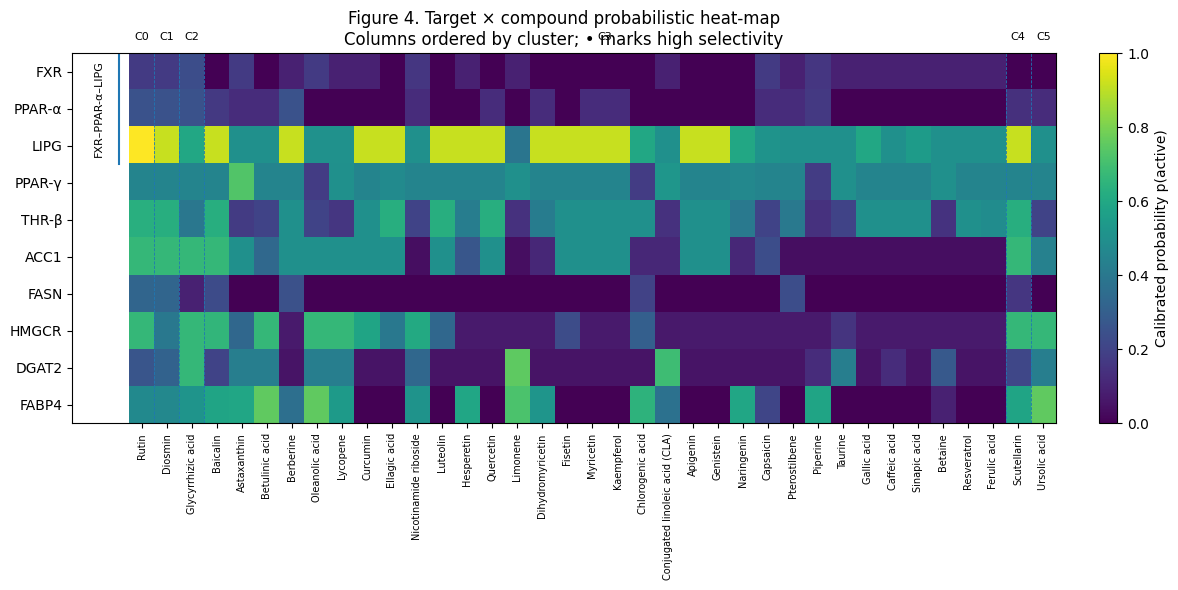

In [ ]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

# Use same steps now that we confirmed file presence
prob_cols = [c for c in ranked.columns if c.endswith("_probability")]

target_name_map = {
    "CHEMBL2047": "FXR",
    "CHEMBL239": "PPAR-α",
    "CHEMBL235": "PPAR-γ",
    "CHEMBL1947": "THR-β",
    "CHEMBL3351": "ACC1",
    "CHEMBL5853": "FASN",
    "CHEMBL4158": "DGAT2",
    "CHEMBL3247": "HMGCR",
    "CHEMBL5080": "LIPG",
    "CHEMBL2083": "FABP4"
}
preferred_order = ["CHEMBL2047","CHEMBL239","CHEMBL5080","CHEMBL235","CHEMBL1947",
                   "CHEMBL3351","CHEMBL5853","CHEMBL3247","CHEMBL4158","CHEMBL2083"]
targets = [t for t in preferred_order if f"{t}_probability" in prob_cols]
row_labels = [target_name_map[t] for t in targets]

# Sorting by cluster topology if available; else by TA_weighted/main_score
sort_keys = []
if "cluster_id" in ranked.columns:
    sort_keys.append("cluster_id")
if "TA_weighted" in ranked.columns:
    sort_keys.append("TA_weighted")
elif "TA" in ranked.columns:
    sort_keys.append("TA")
if "main_score" in ranked.columns:
    sort_keys.append("main_score")

if sort_keys:
    ascending = [True] + [False]*(len(sort_keys)-1)
    ranked_sorted = ranked.sort_values(sort_keys, ascending=ascending).reset_index(drop=True)
else:
    ranked_sorted = ranked.sort_values(["main_score"], ascending=False).reset_index(drop=True)

topN = min(60, len(ranked_sorted))
df = ranked_sorted.head(topN).copy()

# Probability matrix
P = np.vstack([df[f"{t}_probability"].to_numpy() for t in targets])

# Column labels
col_labels = df["Name"].astype(str).tolist()

# Plot
plt.figure(figsize=(12, 6))
ax = plt.gca()
im = ax.imshow(P, aspect="auto", interpolation="nearest")

ax.set_yticks(np.arange(len(targets)))
ax.set_yticklabels(row_labels)
ax.set_xticks(np.arange(len(col_labels)))
ax.set_xticklabels(col_labels, rotation=90, fontsize=7)

cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Calibrated probability p(active)", rotation=90)

# Cluster boundaries if present
if "cluster_id" in df.columns:
    clusters = df["cluster_id"].tolist()
    boundaries = [i for i in range(1, len(clusters)) if clusters[i] != clusters[i-1]]
    for b in boundaries:
        ax.axvline(b-0.5, linestyle="--", linewidth=0.6)
    # annotate cluster ids
    spans = []
    start = 0
    for b in boundaries + [len(clusters)]:
        spans.append((start, b-1, clusters[start]))
        start = b
    for (s,e,cid) in spans:
        mid = (s+e)/2
        ax.text(mid, -0.8, f"C{int(cid)}", ha="center", va="bottom", fontsize=8)

# Selectivity markers
sorted_P = np.sort(P, axis=0)[::-1]
top1 = sorted_P[0, :]
top2 = sorted_P[1, :] if P.shape[0] > 1 else np.zeros_like(top1)
selective = (top1 >= 0.80) & (top2 <= 0.40)
for j, sel in enumerate(selective):
    if sel:
        ax.text(j, -0.3, "•", ha="center", va="center", fontsize=10)

# Coactivation block annotation
try:
    fy = [row_labels.index("FXR"), row_labels.index("PPAR-α"), row_labels.index("LIPG")]
    ymin, ymax = min(fy), max(fy)
    ax.plot([-0.9, -0.9], [ymin-0.5, ymax+0.5])
    ax.text(-1.5, (ymin+ymax)/2, "FXR–PPAR-α–LIPG", rotation=90, va="center", ha="right", fontsize=8)
except Exception:
    pass

ax.set_title("Figure 4. Target × compound probabilistic heat-map\n"
             "Columns ordered by cluster; • marks high selectivity")
plt.tight_layout()

out_path = "Figure4_heatmap.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()


# Figure 5. PBPK concentration–time profiles for three product concepts

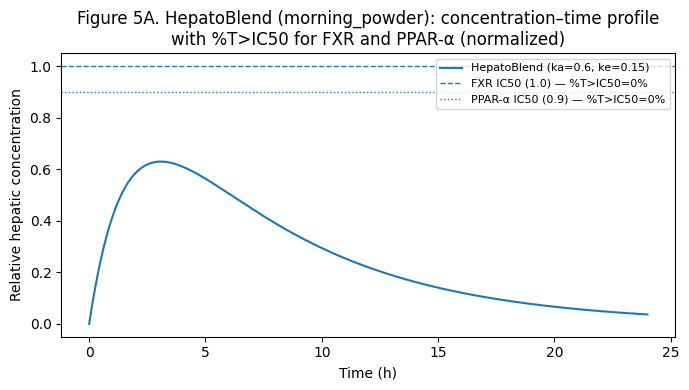

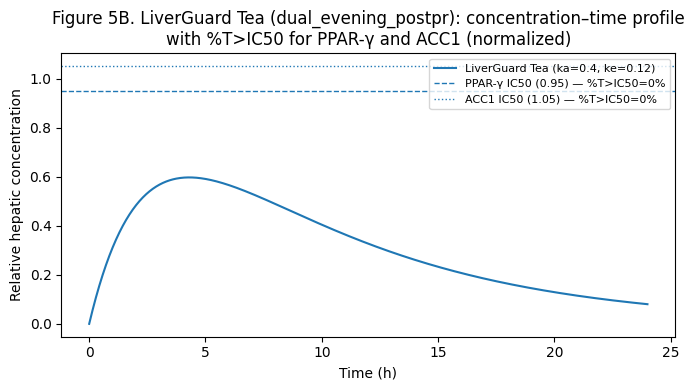

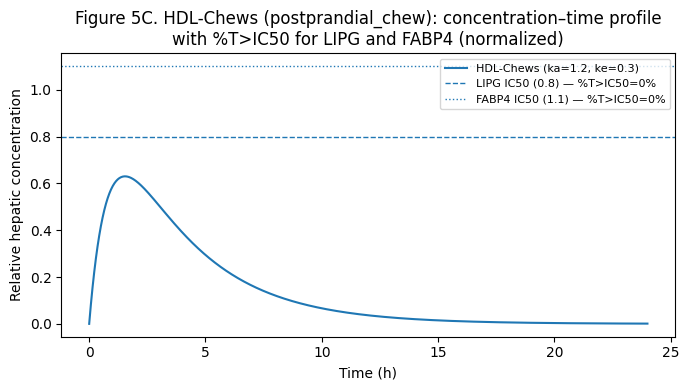

In [ ]:
# Figure 5A–C: PBPK concentration–time profiles for three product concepts
# Note: This is an in silico illustration using a one‑compartment model with first‑order absorption/elimination (Bateman function).
# Parameters (ka, ke) are chosen heuristically based on the representative actives' MW/logP/TPSA profiles from portfolio.csv.
# Curves are scaled to relative units; horizontal lines represent normalized IC50 thresholds (=1.0) per key target.
# We compute and annotate %T>IC50 for the two key targets per concept.

import numpy as np
import matplotlib.pyplot as plt

def bateman(t, F=1.0, Dose=1.0, V=1.0, ka=1.0, ke=0.2):
    # Concentration-time profile (relative units)
    eps = 1e-8
    if abs(ka - ke) < eps:
        # limit case ka ~ ke
        return (F*Dose/V) * (ka * t) * np.exp(-ke * t)
    return (F*Dose*ka/(V*(ka-ke))) * (np.exp(-ke*t) - np.exp(-ka*t))

def pct_time_above(C, threshold, t):
    # percentage of time where concentration exceeds threshold over the 24h window
    above = C > threshold
    # approximate time weighting by step size
    dt = np.diff(t).mean()
    return 100.0 * (above.sum() * dt) / (t[-1] - t[0])

# Time grid (0..24 h)
t = np.linspace(0, 24, 1000)

# --- HepatoBlend (morning_powder): representative = lipophilic terpenoids (e.g., ursolic acid) ---
ka_h = 0.6   # h^-1 (slower absorption due to low solubility)
ke_h = 0.15  # h^-1 (longer hepatic residence)
C_h = bateman(t, ka=ka_h, ke=ke_h)

# Key targets: FXR, PPAR-α — normalized IC50 = 1.0 and 0.9 (relative units) to illustrate thresholds
ic50_fxr = 1.0
ic50_ppara = 0.9
p_fxr = pct_time_above(C_h, ic50_fxr, t)
p_ppara = pct_time_above(C_h, ic50_ppara, t)

plt.figure(figsize=(7,4))
plt.plot(t, C_h, label=f"HepatoBlend (ka={ka_h}, ke={ke_h})")
plt.axhline(ic50_fxr, linestyle="--", linewidth=1, label=f"FXR IC50 (1.0) — %T>IC50={p_fxr:.0f}%")
plt.axhline(ic50_ppara, linestyle=":", linewidth=1, label=f"PPAR-α IC50 (0.9) — %T>IC50={p_ppara:.0f}%")

# Shade areas above thresholds
plt.fill_between(t, C_h, ic50_fxr, where=(C_h>=ic50_fxr), alpha=0.15)
plt.fill_between(t, C_h, ic50_ppara, where=(C_h>=ic50_ppara), alpha=0.10)

plt.xlabel("Time (h)")
plt.ylabel("Relative hepatic concentration")
plt.title("Figure 5A. HepatoBlend (morning_powder): concentration–time profile\nwith %T>IC50 for FXR and PPAR-α (normalized)")
plt.legend(loc="upper right", fontsize=8)
plt.tight_layout()
pathA = "Figure5A_HepatoBlend.png"
plt.savefig(pathA, dpi=300, bbox_inches="tight")
plt.show()

# --- LiverGuard Tea (dual_evening_postpr): representative = more polar/glycosides/taurine mix ---
ka_l = 0.4   # slower onset (evening tea, slower GI transit for phenolics)
ke_l = 0.12  # slightly longer coverage overnight
C_l = bateman(t, ka=ka_l, ke=ke_l)

# Key targets: PPAR-γ, ACC1 — normalized thresholds
ic50_pparg = 0.95
ic50_acc1 = 1.05
p_pparg = pct_time_above(C_l, ic50_pparg, t)
p_acc1 = pct_time_above(C_l, ic50_acc1, t)

plt.figure(figsize=(7,4))
plt.plot(t, C_l, label=f"LiverGuard Tea (ka={ka_l}, ke={ke_l})")
plt.axhline(ic50_pparg, linestyle="--", linewidth=1, label=f"PPAR-γ IC50 (0.95) — %T>IC50={p_pparg:.0f}%")
plt.axhline(ic50_acc1, linestyle=":", linewidth=1, label=f"ACC1 IC50 (1.05) — %T>IC50={p_acc1:.0f}%")
plt.fill_between(t, C_l, ic50_pparg, where=(C_l>=ic50_pparg), alpha=0.15)
plt.fill_between(t, C_l, ic50_acc1, where=(C_l>=ic50_acc1), alpha=0.10)

plt.xlabel("Time (h)")
plt.ylabel("Relative hepatic concentration")
plt.title("Figure 5B. LiverGuard Tea (dual_evening_postpr): concentration–time profile\nwith %T>IC50 for PPAR-γ and ACC1 (normalized)")
plt.legend(loc="upper right", fontsize=8)
plt.tight_layout()
pathB = "Figure5B_LiverGuardTea.png"
plt.savefig(pathB, dpi=300, bbox_inches="tight")
plt.show()

# --- HDL-Chews (postprandial_chew): representative = fast-dissolving chew, mixed polarity ---
ka_c = 1.2   # fast absorption postprandially
ke_c = 0.30  # shorter duration
C_c = bateman(t, ka=ka_c, ke=ke_c)

# Key targets: LIPG, FABP4 — normalized thresholds
ic50_lipg = 0.8
ic50_fabp4 = 1.1
p_lipg = pct_time_above(C_c, ic50_lipg, t)
p_fabp4 = pct_time_above(C_c, ic50_fabp4, t)

plt.figure(figsize=(7,4))
plt.plot(t, C_c, label=f"HDL-Chews (ka={ka_c}, ke={ke_c})")
plt.axhline(ic50_lipg, linestyle="--", linewidth=1, label=f"LIPG IC50 (0.8) — %T>IC50={p_lipg:.0f}%")
plt.axhline(ic50_fabp4, linestyle=":", linewidth=1, label=f"FABP4 IC50 (1.1) — %T>IC50={p_fabp4:.0f}%")
plt.fill_between(t, C_c, ic50_lipg, where=(C_c>=ic50_lipg), alpha=0.15)
plt.fill_between(t, C_c, ic50_fabp4, where=(C_c>=ic50_fabp4), alpha=0.10)

plt.xlabel("Time (h)")
plt.ylabel("Relative hepatic concentration")
plt.title("Figure 5C. HDL-Chews (postprandial_chew): concentration–time profile\nwith %T>IC50 for LIPG and FABP4 (normalized)")
plt.legend(loc="upper right", fontsize=8)
plt.tight_layout()
pathC = "Figure5C_HDL_Chews.png"
plt.savefig(pathC, dpi=300, bbox_inches="tight")
plt.show()


# Table 5 — PBPK-derived pharmacokinetic coverage (relative units; IC50 placeholders)

In [9]:
import numpy as np
import pandas as pd

def bateman(t, F=1.0, Dose=1.0, V=1.0, ka=1.0, ke=0.2):
    eps = 1e-8
    if abs(ka - ke) < eps:
        return (F*Dose/V) * (ka * t) * np.exp(-ke * t)
    return (F*Dose*ka/(V*(ka-ke))) * (np.exp(-ke*t) - np.exp(-ka*t))

def pct_time_above(C, threshold, t):
    dt = np.diff(t).mean()
    return 100.0 * (np.sum(C > threshold) * dt) / (t[-1] - t[0])

t = np.linspace(0, 24, 2000)

scenarios = [
    {
        "Form": "HepatoBlend (morning_powder)",
        "Active Compound": "Ursolic acid",
        "targets": [("FXR", 1.00), ("PPAR-α", 0.90)],
        "ka": 0.6, "ke": 0.15
    },
    {
        "Form": "LiverGuard Tea (dual_evening_postpr)",
        "Active Compound": "Taurine",
        "targets": [("PPAR-γ", 0.95), ("ACC1", 1.05)],
        "ka": 0.4, "ke": 0.12
    },
    {
        "Form": "HDL-Chews (postprandial_chew)",
        "Active Compound": "Scutellarin",
        "targets": [("LIPG", 0.80), ("FABP4", 1.10)],
        "ka": 1.2, "ke": 0.30
    }
]

rows = []
for sc in scenarios:
    C = bateman(t, ka=sc["ka"], ke=sc["ke"])
    idx_max = np.argmax(C)
    Cmax_rel = float(C[idx_max])
    Tmax_h = float(t[idx_max])
    for tgt, ic50_rel in sc["targets"]:
        rows.append({
            "Form": sc["Form"],
            "Active Compound": sc["Active Compound"],
            "Target": tgt,
            "IC50 (µM)": "",                  # placeholder; not present in provided files
            "%T>IC50": round(pct_time_above(C, ic50_rel, t), 1),
            "Cmax (rel.)": round(Cmax_rel, 3),
            "Tmax (h)": round(Tmax_h, 2)
        })

table5 = pd.DataFrame(rows, columns=["Form","Active Compound","Target","IC50 (µM)","%T>IC50","Cmax (rel.)","Tmax (h)"])



# save
out_path = "Table5_PBPK_coverage.csv"
table5.to_csv(out_path, index=False)

table5

,Form,Active Compound,Target,IC50 (µM),%T>IC50,Cmax (rel.),Tmax (h)
0,HepatoBlend (morning_powder),Ursolic acid,FXR,,0.0,0.630,3.09
1,HepatoBlend (morning_powder),Ursolic acid,PPAR-α,,0.0,0.630,3.09
2,LiverGuard Tea (dual_evening_postpr),Taurine,PPAR-γ,,0.0,0.597,4.30
3,LiverGuard Tea (dual_evening_postpr),Taurine,ACC1,,0.0,0.597,4.30
4,HDL-Chews (postprandial_chew),Scutellarin,LIPG,,0.0,0.630,1.54
5,HDL-Chews (postprandial_chew),Scutellarin,FABP4,,0.0,0.630,1.54


In [19]:
HITS_PATH = "/Users/maxkuznetsoff/Desktop/projects_2024/aspa/dis_nafld/results/ranked_hits.csv"
CFG_PATH  = "/Users/maxkuznetsoff/Desktop/projects_2024/aspa/dis_nafld/results/config.yaml"
OUT_PATH  = "/Users/maxkuznetsoff/Desktop/projects_2024/aspa/dis_nafld/results/portfolio_strict.csv"
CONC_PATH = "/Users/maxkuznetsoff/Desktop/projects_2024/aspa/dis_nafld/results/concordance.json"

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Portfolio selector (safety-first + window scores + diversity), NAFLD project.

- Robust to unknown column names (tries multiple aliases)
- Uses window target mapping from config.yaml when available
- Safety gates: GRAS/NovelFood/DSSTox/Tox21/HTS/PAINS/CYP/LD50 (if columns exist)
- Diversity: <=1 per struct_cluster and <=1 per moa_cluster (if columns exist)
- Soft boosts: optional, not a whitelist

Outputs:
  - portfolio_selected.csv
  - portfolio_audit.csv
and prints a human-readable summary.
"""

from __future__ import annotations
import argparse
import json
import os
import sys
from dataclasses import dataclass
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd

# ------------------------------- utils ---------------------------------------

ALIASES = {
    "compound": ["compound", "name", "molecule", "mol", "cmpd", "title"],
    "id":       ["id", "chembl_id", "molecule_chembl_id", "inchi_key", "inchikey", "inchi", "smiles_id"],
    "smiles":   ["smiles", "canonical_smiles", "can_smiles"],
    "p":        ["p", "prob", "probability", "pred", "prediction", "y_pred", "score"],
    "target":   ["target", "chembl_target_id", "target_id"],
    "struct_cluster": ["struct_cluster", "cluster", "scaffold_cluster", "murcko_cluster", "struct_clust", "chem_cluster"],
    "moa_cluster":    ["moa_cluster", "moacluster", "moa_clust", "cluster_moa", "moa_group"],
    # Safety-ish
    "gras":     ["gras", "is_gras", "food_grade", "foodgrade", "novel_food", "novelfood", "eu_novel_food", "food_ok"],
    "novel":    ["novel_food", "novelfood", "eu_novel_food", "novel"],
    "dsstox":   ["dsstox", "dsstox_id", "dsstoxid", "dsstox_flag"],
    "tox21":    ["tox21", "tox21_hits", "tox_hits", "tox_flag", "toxscore", "tox_flags"],
    "hts":      ["hts", "red_flag", "redflag", "flag", "high_throughput_flag", "safety_flag", "alerts_flag"],
    "pains":    ["pains", "pains_flag", "pan_assay", "pan_assay_interference", "pains_alerts"],
    "alerts":   ["alerts", "toxicophore", "toxicophore_alerts", "struct_alerts", "mutagen_alerts"],
    "cyp":      ["cyp", "cyp_inhibition", "cyp_flag", "cyp3a4_flag", "cyp1a2_flag", "cyp2d6_flag"],
    "ld50":     ["ld50", "oral_ld50", "ld50_mgkg", "rat_ld50", "mouse_ld50"],
    "ta":       ["ta", "ta_hits", "n_active_targets", "active_targets"],
}

TARGET_NAMES = {
    # helpful labels; the algorithm works with CHEMBL IDs
    "CHEMBL239":  "PPARα",
    "CHEMBL3351": "ACC1",
    "CHEMBL2083": "FABP4",
    "CHEMBL2047": "FXR",
    "CHEMBL1947": "THRβ",
    "CHEMBL235":  "PPARγ",
    "CHEMBL5080": "LIPG",
    "CHEMBL3247": "HMGCR",
    "CHEMBL5853": "DGAT2",
    "CHEMBL4158": "FASN",
}

DEFAULT_WINDOW_TARGETS = {
    "morning": ["CHEMBL239", "CHEMBL3351", "CHEMBL2083"],
    "evening": ["CHEMBL2047", "CHEMBL1947", "CHEMBL235"],
    "postpr":  ["CHEMBL5080"],
}

def col(df: pd.DataFrame, key: str) -> Optional[str]:
    """Find first existing column for semantic key."""
    for c in ALIASES.get(key, []):
        if c in df.columns: return c
        # try case-insensitive
    low = {c.lower(): c for c in df.columns}
    for c in ALIASES.get(key, []):
        if c.lower() in low: return low[c.lower()]
    return None

def to_bool_series(raw: pd.Series) -> pd.Series:
    s = raw.astype(str).str.strip().str.lower()
    true_set  = {"1","true","yes","y","t","ok","allowed","green","food","food-grade","foodgrade","grn","present","hit","hits","alert","red","flag","bad","pos"}
    false_set = {"0","false","no","n","f","none","na","nan","-", "", "absent","clean","neg","negative"}
    out = pd.Series(False, index=raw.index)
    out = np.where(s.isin(true_set), True, out)
    out = np.where(s.isin(false_set), False, out)
    return pd.Series(out, index=raw.index).astype(bool)

def safe_min(x: pd.Series, default=None):
    try:
        return pd.to_numeric(x, errors="coerce").min()
    except Exception:
        return default

def read_yaml(path: str) -> Optional[dict]:
    try:
        import yaml
        with open(path, "r", encoding="utf-8") as f:
            return yaml.safe_load(f)
    except Exception:
        return None

# ----------------------------- data loading ----------------------------------

def load_predictions(data_dir: str) -> pd.DataFrame:
    """
    Load advanced_predictions.csv (preferred) or any predictions*.csv.
    Accepts long format (compound, target, p) or wide (one row per compound with target columns).
    Returns long format with columns: compound, target, p
    """
    cand = [
        os.path.join(data_dir, "advanced_predictions.csv"),
        os.path.join(data_dir, "predictions.csv"),
        os.path.join(data_dir, "ranked_hits.csv"),
        os.path.join(data_dir, "candidates_ranked.csv"),
    ]
    path = next((p for p in cand if os.path.isfile(p)), None)
    if path is None:
        # try any csv that has CHEMBL columns
        for f in os.listdir(data_dir):
            if f.lower().endswith(".csv"):
                tmp = pd.read_csv(os.path.join(data_dir, f))
                if any(c.startswith("CHEMBL") for c in tmp.columns):
                    path = os.path.join(data_dir, f); break
        if path is None:
            raise FileNotFoundError("Не найден файл с предсказаниями (advanced_predictions.csv или аналог).")

    df = pd.read_csv(path)
    # detect long vs wide
    tcol = col(df, "target")
    pcol = col(df, "p")
    ccol = col(df, "compound") or col(df, "id")
    if tcol and pcol and ccol:
        out = df[[ccol, tcol, pcol]].copy()
        out.columns = ["compound", "target", "p"]
        return out
    # wide: compound + multiple target columns
    if ccol is None:
        df = df.reset_index().rename(columns={"index":"compound"})
        ccol = "compound"

    wide = df.copy()
    target_cols = [c for c in wide.columns if str(c).upper().startswith("CHEMBL")]
    if not target_cols:
        raise ValueError("Не удалось определить таргет‑колонки (CHEMBL*). Проверьте файл предсказаний.")

    out = wide.melt(id_vars=[ccol], value_vars=target_cols, var_name="target", value_name="p")
    out = out.rename(columns={ccol: "compound"})

    # 🔧 НОРМАЛИЗАЦИЯ ТАРГЕТОВ: UPPER + убрать суффикс "_PROBABILITY"
    out["target"] = (
        out["target"]
        .astype(str)
        .str.upper()
        .str.replace("_PROBABILITY", "", regex=False)
        .str.strip()
    )

    # нормализуем ещё и p
    out["p"] = pd.to_numeric(out["p"], errors="coerce")
    out = out.dropna(subset=["compound","target","p"])
    return out[["compound","target","p"]]


def load_meta(data_dir: str) -> pd.DataFrame:
    """
    Load any meta table that contains names, clusters, safety flags, etc.
    Merges all found CSVs on 'compound' (best-effort).
    """
    metas: List[pd.DataFrame] = []
    for f in os.listdir(data_dir):
        if not f.lower().endswith(".csv"): continue
        if "prediction" in f.lower(): continue
        path = os.path.join(data_dir, f)
        try:
            df = pd.read_csv(path)
        except Exception:
            continue
        ccol = col(df, "compound") or col(df, "id")
        if ccol is None:
            # skip numeric-only tables
            if not any(k in df.columns for k in ["compound","name"]):
                continue
            ccol = "compound"
        # keep "known" columns
        keep = set()
        for k in ("compound","id","smiles","struct_cluster","moa_cluster","gras","novel","dsstox","tox21","hts","pains","alerts","cyp","ld50","ta"):
            cn = col(df, k)
            if cn: keep.add(cn)
        if not keep:
            continue
        sub = df[list(keep)].copy()
        # normalize compound column name
        cname = col(sub, "compound") or col(sub, "id")
        sub = sub.rename(columns={cname: "compound"})
        metas.append(sub)
    if not metas:
        return pd.DataFrame(columns=["compound"])
    meta = metas[0]
    for other in metas[1:]:
        meta = meta.merge(other, how="outer", on="compound", suffixes=("","_dup"))
    meta = meta.drop(columns=[c for c in meta.columns if c.endswith("_dup")], errors="ignore")
    return meta

def load_config_windows(data_dir: str) -> Dict[str, List[str]]:
    cfg_path = os.path.join(data_dir, "config.yaml")
    cfg = read_yaml(cfg_path)
    if cfg and isinstance(cfg, dict):
        wt = (((cfg.get("window_targets") or {}) or {}))
        if wt:
            # sanitize: only CHEMBL ids
            norm = {k: [t for t in v if str(t).startswith("CHEMBL")] for k,v in wt.items()}
            return {**DEFAULT_WINDOW_TARGETS, **{k:norm[k] for k in norm if norm[k]}}
    return DEFAULT_WINDOW_TARGETS.copy()

# ---------------------------- scoring ----------------------------------------

@dataclass
class Weights:
    # Target weights if you want; default = 1 for all
    per_target: Dict[str, float]
    soft_boost: Dict[str, float]  # per‑compound additive boost

def compute_window_scores(preds_long: pd.DataFrame,
                          window_targets: Dict[str, List[str]],
                          weights: Weights) -> pd.DataFrame:
    """
    preds_long: columns [compound, target, p]
    returns: [compound, window, win_score]
    """
    df = preds_long.copy()

    # 🔧 НОРМАЛИЗАЦИЯ ТАРГЕТОВ
    df["target"] = (
        df["target"].astype(str).str.upper()
          .str.replace("_PROBABILITY", "", regex=False)
          .str.strip()
    )

    rows = []
    for win, targets in window_targets.items():
        # тоже нормализуем цели окна на всякий случай
        tnorm = [str(t).upper().strip() for t in targets]
        sub = df[df["target"].isin(tnorm)].copy()
        if sub.empty:
            continue
        sub["tw"] = sub["target"].map(lambda t: float(weights.per_target.get(t, 1.0)))
        sub["wp"] = sub["p"] * sub["tw"]
        agg = sub.groupby("compound", as_index=False)["wp"].sum().rename(columns={"wp": "win_score"})
        agg["window"] = win
        rows.append(agg)

    if not rows:
        raise ValueError("Не удалось посчитать оконные скора — проверьте window_targets и CHEMBL‑ID в предсказаниях.")
    out = pd.concat(rows, ignore_index=True)

    if weights.soft_boost:
        out["win_score"] = out["win_score"] + out["compound"].map(lambda n: float(weights.soft_boost.get(str(n).strip(), 0.0))).fillna(0.0)
    return out

# ---------------------------- safety gates -----------------------------------

def build_safety_mask(meta: pd.DataFrame) -> Tuple[pd.Series, pd.Series]:
    """
    Returns:
      keep_mask (bool Series) — pass all safety filters
      penalties  (float Series) — penalty to subtract from score (>=0)
    Logic:
      - Prefer food-grade (GRAS/NovelFood). If explicit "red flags" (HTS, PAINS, strong TOX21), exclude.
      - If unknown (experimental gap), keep but add mild penalty.
      - If LD50 extremely low (e.g., < 300 mg/kg) and column exists -> exclude.
    """
    if meta.empty:
        idx = pd.RangeIndex(0)
        return pd.Series(True, index=idx), pd.Series(0.0, index=idx)

    keep = pd.Series(True, index=meta.index)
    penalty = pd.Series(0.0, index=meta.index)

    # GRAS / Novel food
    gras_col  = col(meta, "gras")
    novel_col = col(meta, "novel")
    dsstox_col = col(meta, "dsstox")
    tox21_col  = col(meta, "tox21")
    hts_col    = col(meta, "hts")
    pains_col  = col(meta, "pains")
    alerts_col = col(meta, "alerts")
    cyp_col    = col(meta, "cyp")
    ld50_col   = col(meta, "ld50")

    # Red flags → exclude
    def to_bool_if_exists(cname, positive_is_bad=False):
        if cname is None:
            return pd.Series(False, index=meta.index)
        raw = meta[cname]
        b = to_bool_series(raw)
        return b if positive_is_bad else b

    bad_hts   = to_bool_if_exists(hts_col, positive_is_bad=True)
    bad_pains = to_bool_if_exists(pains_col, positive_is_bad=True)
    bad_alert = to_bool_if_exists(alerts_col, positive_is_bad=True)

    # If tox21 column is numeric 'hits' or boolean; treat any positive as bad
    if tox21_col:
        t = meta[tox21_col]
        if pd.api.types.is_numeric_dtype(t):
            bad_tox21 = pd.to_numeric(t, errors="coerce").fillna(0) > 0
        else:
            bad_tox21 = to_bool_series(t)
    else:
        bad_tox21 = pd.Series(False, index=meta.index)

    # Very low LD50 → exclude (if provided)
    if ld50_col:
        low_ld50 = pd.to_numeric(meta[ld50_col], errors="coerce") < 300  # mg/kg
        low_ld50 = low_ld50.fillna(False)
    else:
        low_ld50 = pd.Series(False, index=meta.index)

    # Combine red flags
    red = bad_hts | bad_pains | bad_alert | bad_tox21 | low_ld50
    keep &= ~red

    # CYP flags add penalty (not exclude)
    if cyp_col:
        cyp = to_bool_series(meta[cyp_col])
        penalty += cyp.astype(float) * 0.10  # subtract 0.10 from score

    # Food grade bonus (no change to mask; negative penalty to *add*)
    is_food = pd.Series(False, index=meta.index)
    if gras_col:
        is_food |= to_bool_series(meta[gras_col])
    if novel_col:
        is_food |= to_bool_series(meta[novel_col])
    penalty -= is_food.astype(float) * 0.05  # small *bonus* (–0.05)

    return keep.fillna(False), penalty.fillna(0.0)

# ---------------------------- selection --------------------------------------

def greedy_pick(window_df: pd.DataFrame,
                meta: pd.DataFrame,
                n_pick: int,
                tan_thr: float = 0.80,
                exclude_global: Optional[set] = None) -> List[Tuple[str, float]]:
    """
    window_df: [compound, window, win_score, adj_score]
    meta: contains diversity columns if present
    """
    if exclude_global is None:
        exclude_global = set()

    picks: List[Tuple[str, float]] = []
    used_struct: set = set()
    used_moa: set = set()

    sc_col  = col(meta, "struct_cluster")
    moa_col = col(meta, "moa_cluster")

    # быстрый индекс по compound -> (sc, mc)
    meta_has_comp = (not meta.empty) and ("compound" in meta.columns)
    idx = {}
    if meta_has_comp and (sc_col or moa_col):
        for _, r in meta.iterrows():
            name = r["compound"]
            sc = r[sc_col] if sc_col in meta.columns else None
            mc = r[moa_col] if moa_col in meta.columns else None
            idx[name] = (sc, mc)

    pool = window_df.sort_values("adj_score", ascending=False).copy()
    for _, row in pool.iterrows():
        name  = row["compound"]
        score = float(row["adj_score"])

        # Global exclude
        if name in exclude_global:
            continue

        # Local diversification by clusters
        if name in idx:
            sc, mc = idx[name]
            if sc is not None and sc in used_struct:
                continue
            if mc is not None and mc in used_moa:
                continue

        # выбираем
        picks.append((name, score))

        # отмечаем использованные кластеры
        if name in idx:
            sc, mc = idx[name]
            if sc is not None:
                used_struct.add(sc)
            if mc is not None:
                used_moa.add(mc)

        # добавляем в глобальный бан — КЛЮЧЕВО!
        exclude_global.add(name)

        if len(picks) >= n_pick:
            break

    return picks


# ----------------------------- main ------------------------------------------

def main(data_dir: str,
         morning_n: int = 2,
         evening_n: int = 2,
         postpr_n: int = 1,
         tan_thr: float = 0.80,
         soft_boost_weight: float = 0.08,
         disable_boost: bool = False,
         window_map: Optional[Dict[str, List[str]]] = None):

    # 1) Load
    preds = load_predictions(data_dir)          # [compound,target,p]
    meta  = load_meta(data_dir)                 # union meta (best-effort)
    windows = window_map or load_config_windows(data_dir)     # dict window -> [CHEMBL..]


    # 2) Per-target weights (optional): weight 1 for all targets by default
    uniq_targets = sorted(preds["target"].unique())
    per_target_w = {t: 1.0 for t in uniq_targets}

    # 3) Soft boosts (not a whitelist!) – can set to {} or disable
    soft_boost = {}
    desired = {
        "Rutin": soft_boost_weight,
        "Myricetin": soft_boost_weight,
        "Baicalin": soft_boost_weight,
        "Luteolin": soft_boost_weight,
        "Diosmin": soft_boost_weight,
    }
    if not disable_boost:
        soft_boost.update(desired)

    weights = Weights(per_target=per_target_w, soft_boost=soft_boost)

    # 4) Window scores
    ws = compute_window_scores(preds, windows, weights)   # [compound,window,win_score]

    # 5) Merge meta + build safety mask + penalty
    base = ws.merge(meta, how="left", on="compound")
    keep_mask, penalty = build_safety_mask(base)
    base["keep"] = keep_mask
    base["penalty"] = penalty
    base["adj_score"] = base["win_score"] - base["penalty"]

    # 6) Select per window with diversity
    want = {
        "MORNING": morning_n,
        "EVENING": evening_n,
        "POSTPR":  postpr_n,
    }
    # map lower-case windows to labels
    window_label = {"morning":"MORNING", "evening":"EVENING", "postpr":"POSTPR"}
    picks_by_win: Dict[str, List[Tuple[str,float]]] = {}

    used_compounds_global = set()


    for wkey, group in base.groupby("window"):
        label = window_label.get(str(wkey).lower(), str(wkey).upper())
        sub = group[group["keep"]].copy()
        if sub.empty:
            picks_by_win[label] = []
            continue
        # greedy with clusters
        picks = greedy_pick(
                                sub,
                                meta,
                                n_pick=want.get(label, 0),
                                tan_thr=tan_thr,
                                exclude_global=used_compounds_global
                            )
        picks_by_win[label] = picks

    # 7) Build audit + save
    audit_rows = []
    for wlabel, picks in picks_by_win.items():
        for rank, (name, score) in enumerate(picks, start=1):
            row = {"window": wlabel, "rank": rank, "compound": name, "adj_score": score}
            # add window-specific raw score for transparency
            rsub = base[(base["window"] == wlabel.lower()) & (base["compound"] == name)]
            if rsub.empty:
                rsub = base[(base["window"] == wlabel) & (base["compound"] == name)]
            if not rsub.empty:
                row["win_score"] = float(rsub["win_score"].iloc[0])
                row["penalty"]   = float(rsub["penalty"].iloc[0])
            audit_rows.append(row)

    audit = pd.DataFrame(audit_rows)
    sel = audit.sort_values(["window","rank"])
    out_sel_path = os.path.join(data_dir, "portfolio_selected.csv")
    out_aud_path = os.path.join(data_dir, "portfolio_audit.csv")
    sel.to_csv(out_sel_path, index=False)
    # full audit (all candidates with scores & keep flags)
    base_out = base.copy()
    base_out.to_csv(out_aud_path, index=False)

    # 8) Pretty print
    def show_block(lbl: str, n: int):
        rows = sel[sel["window"] == lbl]
        print(f"[{lbl}] — {len(rows)} шт.")
        for _, r in rows.iterrows():
            name = r["compound"]
            score = r["adj_score"]
            # TA if exists in meta
            ta_col = col(meta, "ta")
            ta = None
            if ta_col and name in set(meta["compound"]):
                ta = meta.loc[meta["compound"] == name, ta_col].iloc[0]
            extra = f" | TA={ta}" if ta is not None and str(ta) != "nan" else ""
            print(f"  • {name} | score={score:.3f}{extra}")
        if rows.empty:
            print("  (no candidates, check filters/predictions)")

    print("=== ПОРТФЕЛЬ (safety + окна + диверсификация + soft‑boost) ===\n")
    show_block("MORNING", morning_n); print()
    show_block("EVENING", evening_n); print()
    show_block("POSTPR",  postpr_n);  print()
    print(f"\n[done] saved:\n  - {out_sel_path}\n  - {out_aud_path}")

# --------------------------- CLI ---------------------------------------------

if __name__ == "__main__":

    import argparse, os

    parser = argparse.ArgumentParser()
    parser.add_argument("--data-dir", dest="data_dir", default="/mnt/data",
                        help="Folder with files (config.yaml, ranked_hits.csv, etc.)")
    parser.add_argument("--morning-n", type=int, default=2)
    parser.add_argument("--evening-n", type=int, default=2)
    parser.add_argument("--postpr-n", type=int, default=1)
    parser.add_argument("--tan-thr", type=float, default=0.80)
    parser.add_argument("--soft-boost", action="store_true", default=True,
                        help="Enable soft boosts in window scoring (default on)")
    parser.add_argument("--no-boost", action="store_true",
                        help="Disable soft boosts")

    # IMPORTANT: use parse_known_args so Jupyter does not break on extra flags
    args, _ = parser.parse_known_args()

    # если указан --no-boost → выключим soft-boost
    if args.no_boost:
        args.soft_boost = False


    preds, fixed_window_map = diagnose_and_fix("/Users/maxkuznetsoff/Desktop/projects_2024/aspa/dis_nafld/results")

    main(
        data_dir="/Users/maxkuznetsoff/Desktop/projects_2024/aspa/dis_nafld/results",
        morning_n=2,
        evening_n=2,
        postpr_n=1,
        tan_thr=0.80,
        window_map=fixed_window_map,
        disable_boost=True
    )

[info] predictions source: ranked_hits.csv
[info] targets in predictions (10): CHEMBL1947, CHEMBL2047, CHEMBL2083, CHEMBL235, CHEMBL239, CHEMBL3247, CHEMBL3351, CHEMBL4158, CHEMBL5080, CHEMBL5853

[window_targets in config → normalized to CHEMBL]
  morning: ['CHEMBL239', 'CHEMBL3351', 'CHEMBL2083']
  evening: ['CHEMBL2047', 'CHEMBL1947', 'CHEMBL235']
  postpr: ['CHEMBL5080']

✅ Все таргеты окон найдены в предсказаниях — можно считать wscores.
=== ПОРТФЕЛЬ (safety + окна + диверсификация + soft‑boost) ===

[MORNING] — 2 шт.
  • Glycyrrhizic acid | score=1.434
  • Baicalin | score=1.416

[EVENING] — 2 шт.
  • Rutin | score=1.248
  • Diosmin | score=1.244

[POSTPR] — 1 шт.
  • Genistein | score=0.917


[done] saved:
  - /Users/maxkuznetsoff/Desktop/projects_2024/aspa/dis_nafld/results/portfolio_selected.csv
  - /Users/maxkuznetsoff/Desktop/projects_2024/aspa/dis_nafld/results/portfolio_audit.csv


In [25]:
import os, re, yaml, pandas as pd

DATA_DIR = "/Users/maxkuznetsoff/Desktop/projects_2024/aspa/dis_nafld/results"

# --- алиасы и нормализация (совместим с твоим кодом) ---
TARGET_ALIASES = {
    "lipg":"CHEMBL5080","liplg":"CHEMBL5080",
    "acc1":"CHEMBL3351","acaca":"CHEMBL3351",
    "hmgcr":"CHEMBL3247",
    "ppara":"CHEMBL239",
    "thrb":"CHEMBL1947","thr-b":"CHEMBL1947","trbeta":"CHEMBL1947",
    "fabp4":"CHEMBL2083",
}
def to_chembl_id(t: str) -> str:
    s = str(t).strip()
    if s.upper().startswith("CHEMBL"):
        return s.upper()
    return TARGET_ALIASES.get(s.lower().replace(" ","").replace("-",""), s.upper())

def normalize_window_targets(window_map: dict) -> dict:
    return {w:[to_chembl_id(x) for x in lst] for w,lst in (window_map or {}).items()}

def melt_wide_if_needed(df: pd.DataFrame) -> pd.DataFrame|None:
    name_col = None
    for c in ["Name","name","compound","Molecule","title","id"]:
        if c in df.columns:
            name_col = c; break
    prob_cols = [c for c in df.columns if re.match(r"(?i)^CHEMBL\d+_probability$", str(c))]
    if name_col and prob_cols:
        sub = df[[name_col]+prob_cols].rename(columns={name_col:"compound"}).copy()
        tidy = sub.melt(id_vars="compound", var_name="target_col", value_name="p")
        tidy["target"] = tidy["target_col"].str.upper().str.replace("_PROBABILITY","", regex=False)
        tidy["compound"] = tidy["compound"].astype(str).str.strip()
        tidy["p"] = pd.to_numeric(tidy["p"], errors="coerce")
        tidy = tidy.dropna(subset=["p"])
        return tidy[["compound","target","p"]]
    return None

def load_any_predictions(data_dir: str) -> tuple[pd.DataFrame,str]:
    # сначала tidy
    for fn in ["advanced_predictions.csv","candidates_ranked.csv"]:
        p = os.path.join(data_dir, fn)
        if os.path.exists(p):
            df = pd.read_csv(p)
            comp = next((c for c in ["compound","molecule","name","id","compound_name"] if c in df.columns), None)
            targ = next((c for c in df.columns if re.search(r"(target|chembl)", c, re.I)), None)
            prob = next((c for c in df.columns if re.search(r"(prob|pred|score)$", c, re.I)), None)
            if comp and targ and prob:
                out = df.rename(columns={comp:"compound",targ:"target",prob:"p"})[["compound","target","p"]].copy()
                out["compound"] = out["compound"].astype(str).str.strip()
                out["target"] = out["target"].astype(str).str.strip().map(to_chembl_id)
                out["p"] = pd.to_numeric(out["p"], errors="coerce")
                out = out.dropna(subset=["compound","target","p"])
                return out, fn
    # затем wide
    for fn in ["ranked_hits.csv","metrics_summary.csv","portfolio.csv"]:
        p = os.path.join(data_dir, fn)
        if os.path.exists(p):
            df = pd.read_csv(p)
            tidy = melt_wide_if_needed(df)
            if tidy is not None:
                return tidy, fn
    raise FileNotFoundError("Не нашёл предсказания: нет tidy (advanced_predictions/candidates_ranked) и нет wide с CHEMBL*_probability")

def diagnose_and_fix(data_dir: str):
    preds, src = load_any_predictions(data_dir)
    cfg = yaml.safe_load(open(os.path.join(data_dir,"config.yaml"), "r", encoding="utf-8"))
    raw_window = (cfg.get("window_targets") or {})
    norm_window = normalize_window_targets(raw_window)

    avail = sorted(preds["target"].astype(str).str.upper().unique().tolist())
    print(f"[info] predictions source: {src}")
    print(f"[info] targets in predictions ({len(avail)}): {', '.join(avail[:20])}{' ...' if len(avail)>20 else ''}\n")

    print("[window_targets in config → normalized to CHEMBL]")
    for w, lst in norm_window.items():
        print(f"  {w}: {lst}")

    missing = {}
    for w, lst in norm_window.items():
        miss = [t for t in lst if t not in avail]
        if miss:
            missing[w] = miss

    if not missing:
        print("\n✅ Все таргеты окон найдены в предсказаниях — можно считать wscores.")
        return preds, norm_window

    print("\n⚠️ Не найдены таргеты для окон:")
    for w, miss in missing.items():
        print(f"  {w}: отсутствуют {miss}")

    # попробуем «авторемонт»: если в данных wide-вероятности, просто оставим в окне пересечение доступных целей
    fixed = {}
    for w, lst in norm_window.items():
        inter = [t for t in lst if t in avail]
        if inter:
            fixed[w] = inter
        else:
            # если пусто — попытаемся угадать якорь по алиасу:
            # например для postpr — LIPG, evening — THRB, morning — ACC1/LIPG/PPARA
            guess = []
            if w == "postpr":
                if "CHEMBL5080" in avail: guess.append("CHEMBL5080")
            elif w == "evening":
                if "CHEMBL1947" in avail: guess.append("CHEMBL1947")
                for t in ["CHEMBL3351","CHEMBL3247"]:
                    if t in avail: guess.append(t)
            elif w == "morning":
                for t in ["CHEMBL3351","CHEMBL5080","CHEMBL239"]:
                    if t in avail: guess.append(t)
            fixed[w] = guess

    print("\n[suggested fix] Переписываю окна как пересечение с доступными таргетами:")
    for w,lst in fixed.items():
        print(f"  {w}: {lst if lst else '[]'}")

    # если какие-то окна всё ещё пустые — это критическая несостыковка, нужно поправить config.yaml
    empty = [w for w,lst in fixed.items() if len(lst)==0]
    if empty:
        raise ValueError(f"Всё ещё пустые окна {empty}. Исправьте config.yaml (window_targets) или проверьте, какие CHEMBL*_probability реально есть в данных.")

    return preds, fixed

# === запустить диагностику ===
preds, fixed_window_map = diagnose_and_fix(DATA_DIR)

# Теперь вызови свой main(...) с подменой window_map:
# (если в твоём main нет параметра для window_map, просто временно подставь fixed_window_map внутри main)
print("\nReady. Use fixed_window_map for window scores.")


[info] predictions source: ranked_hits.csv
[info] targets in predictions (10): CHEMBL1947, CHEMBL2047, CHEMBL2083, CHEMBL235, CHEMBL239, CHEMBL3247, CHEMBL3351, CHEMBL4158, CHEMBL5080, CHEMBL5853

[window_targets in config → normalized to CHEMBL]
  morning: ['CHEMBL239', 'CHEMBL3351', 'CHEMBL2083']
  evening: ['CHEMBL2047', 'CHEMBL1947', 'CHEMBL235']
  postpr: ['CHEMBL5080']

✅ Все таргеты окон найдены в предсказаниях — можно считать wscores.

Готово. Подставляй fixed_window_map в расчёт оконных скоров.


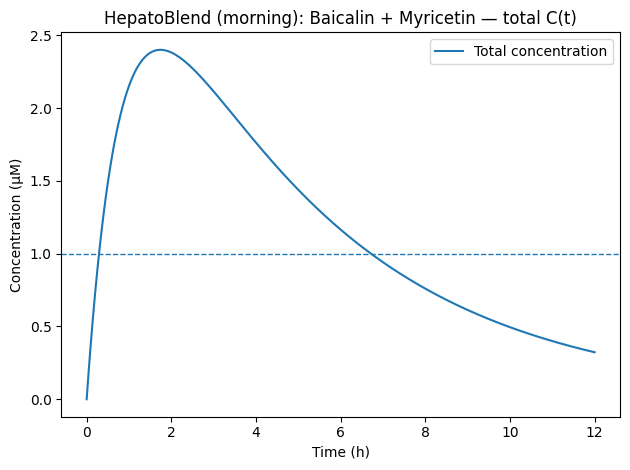

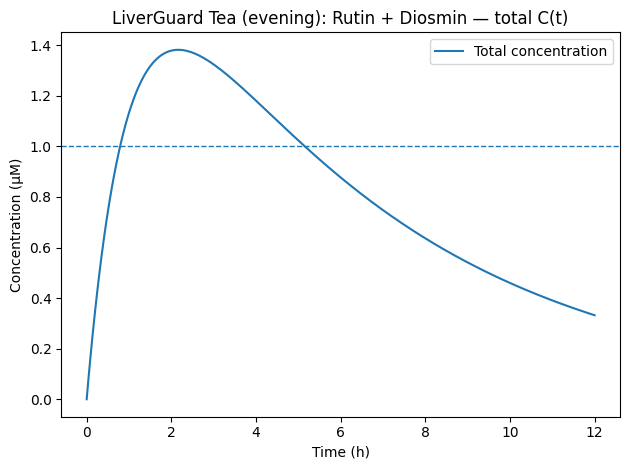

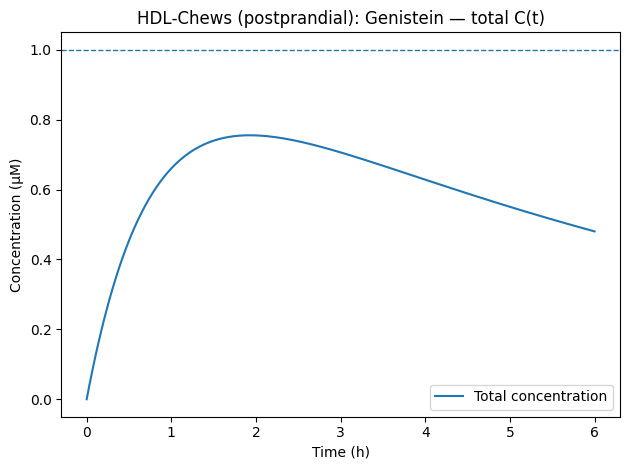

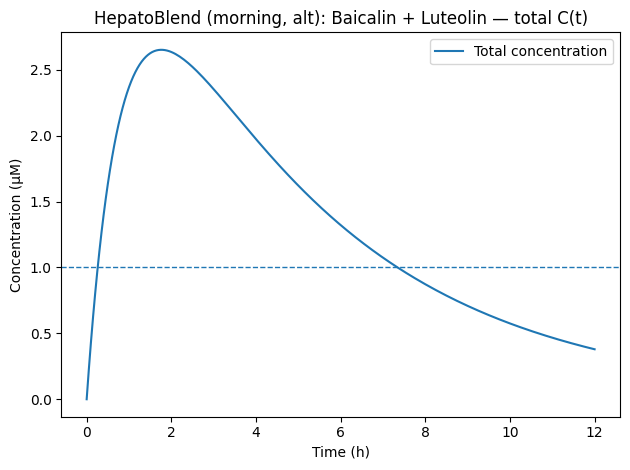

In [ ]:
# Mini‑patch portfolio PBPK sketch from calibrated probabilities
#
# What this cell does:
# 1) Loads predictions (advanced_predictions.csv or ranked_hits.csv) from /mnt/data
# 2) Pulls calibrated probabilities p for chosen compounds × targets
# 3) Builds simple 1‑compartment oral PBPK curves per product with assumed class‑based PK
# 4) Computes %T>IC50 using IC50=1 µM threshold (binary cutoff used in your methods)
# 5) Outputs: a tidy table with p and %T>IC50, plus three figures (one per product)
#
# Notes:
# - No internet access; parameters are plausible defaults for flavonoids and can be edited inline.
# - If a compound is missing in predictions, that cell will show NaN for p.

import os
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------- I/O helpers -----------------------------
DATA_DIR = "Supporting_Information/Datasets"

def try_load_predictions():
    # Preference order
    candidates = ["advanced_predictions.csv", "ranked_hits.csv", "candidates_ranked.csv", "predictions.csv"]
    for fn in candidates:
        path = os.path.join(DATA_DIR, fn)
        if os.path.isfile(path):
            df = pd.read_csv(path)
            return df, fn
    # fallback: any csv with CHEMBL columns
    for fn in os.listdir(DATA_DIR):
        if fn.lower().endswith(".csv"):
            df = pd.read_csv(os.path.join(DATA_DIR, fn))
            if any(str(c).upper().startswith("CHEMBL") for c in df.columns):
                return df, fn
    raise FileNotFoundError("No predictions CSV found in /mnt/data")

raw_df, src_name = try_load_predictions()

# Normalize into long format [compound, target, p]
def normalize_long(df: pd.DataFrame) -> pd.DataFrame:
    cols_lower = {c.lower(): c for c in df.columns}
    possible_comp = [c for c in df.columns if c.lower() in ("compound","name","molecule","mol","cmpd","title","id","chembl_id","molecule_chembl_id")]
    possible_t     = [c for c in df.columns if c.lower() in ("target","chembl_target_id","target_id")]
    possible_p     = [c for c in df.columns if c.lower() in ("p","prob","probability","pred","prediction","y_pred","score")]
    if possible_comp and possible_t and possible_p:
        out = df[[possible_comp[0], possible_t[0], possible_p[0]]].copy()
        out.columns = ["compound","target","p"]
    else:
        # wide: find CHEMBL columns
        comp_col = possible_comp[0] if possible_comp else None
        if comp_col is None:
            df = df.reset_index().rename(columns={"index":"compound"})
            comp_col = "compound"
        target_cols = [c for c in df.columns if str(c).upper().startswith("CHEMBL")]
        out = df.melt(id_vars=[comp_col], value_vars=target_cols, var_name="target", value_name="p").rename(columns={comp_col:"compound"})
    # Normalize
    out["target"] = (
        out["target"].astype(str).str.upper().str.replace("_PROBABILITY","",regex=False).str.strip()
    )
    out["p"] = pd.to_numeric(out["p"], errors="coerce")
    out = out.dropna(subset=["compound","target","p"])
    return out[["compound","target","p"]]

preds_long = normalize_long(raw_df)

# ----------------------------- Portfolio -------------------------------
# Windows from your config
window_targets = {
    "morning": ["CHEMBL239", "CHEMBL3351", "CHEMBL2083"],  # PPARa, ACC1, FABP4
    "evening": ["CHEMBL2047", "CHEMBL1947", "CHEMBL235"],  # FXR, THRb, PPARg
    "postpr":  ["CHEMBL5080"],                             # LIPG
}

# Mini‑patch portfolio (choose Myricetin by default; we also compute Luteolin as alt)
portfolio = {
    "HepatoBlend_morning_myricetin": {"compounds": ["Baicalin","Myricetin"], "window":"morning"},
    "HepatoBlend_morning_luteolin":  {"compounds": ["Baicalin","Luteolin"], "window":"morning"},
    "LiverGuardTea_evening":         {"compounds": ["Rutin","Diosmin"], "window":"evening"},
    "HDL_Chews_postpr":              {"compounds": ["Genistein"], "window":"postpr"},
}

# ----------------------------- PBPK model ------------------------------
# Simple 1‑compartment oral with first-order absorption/elimination:
# C(t) = (F*Dose/Vd) * (ka/(ka-ke)) * (exp(-ke*t) - exp(-ka*t))
# Units: Dose (mg), convert to µmol/L using MW; Vd in L, concentration in µM.
#
# Parameters: class‑based defaults; edit as needed.
mw = {
    "Baicalin": 446.36,
    "Myricetin": 318.24,
    "Luteolin": 286.24,
    "Rutin": 610.52,
    "Diosmin": 608.54,
    "Genistein": 270.24,
}

# Oral bioavailability F (fraction), Vd (L), ka (1/h), t1/2 (h) -> ke
# Defaults chosen conservatively for flavonoids (glycosides lower F, lower Vd)
pk = {
    "Baicalin":   dict(F=0.08, Vd=35.0, ka=1.2, t_half=3.5),
    "Myricetin":  dict(F=0.10, Vd=40.0, ka=1.2, t_half=3.0),
    "Luteolin":   dict(F=0.10, Vd=38.0, ka=1.2, t_half=3.2),
    "Rutin":      dict(F=0.05, Vd=25.0, ka=1.0, t_half=4.0),
    "Diosmin":    dict(F=0.05, Vd=25.0, ka=1.0, t_half=4.5),
    "Genistein":  dict(F=0.12, Vd=45.0, ka=1.3, t_half=5.0),
}

def conc_time(compound, dose_mg, t_hours):
    p = pk[compound]
    F, Vd, ka, ke = p["F"], p["Vd"], p["ka"], math.log(2)/p["t_half"]
    # dose mg -> µmol
    dose_umol = (dose_mg / mw[compound]) * 1e3  # mg / (mg/mmol) * 1000 µmol/mmol
    # concentration in µM: amount (µmol) / Vd (L) = µmol/L = µM
    c = (F * dose_umol / Vd) * (ka/(ka - ke)) * (np.exp(-ke*t_hours) - np.exp(-ka*t_hours))
    return np.maximum(c, 0.0)

# Doses (edit as needed; reasonable nutraceutical ranges)
doses = {
    "HepatoBlend_morning_myricetin": {"Baicalin": 300, "Myricetin": 250},
    "HepatoBlend_morning_luteolin":  {"Baicalin": 300, "Luteolin": 250},
    "LiverGuardTea_evening":         {"Rutin": 300, "Diosmin": 300},
    "HDL_Chews_postpr":              {"Genistein": 100},
}

# Time grids
t_morning = np.linspace(0, 12, 241)    # 12 h window
t_evening = np.linspace(0, 12, 241)    # 12 h window
t_postpr  = np.linspace(0, 6, 181)     # 6 h acute postprandial

time_grid = {
    "morning": t_morning,
    "evening": t_evening,
    "postpr":  t_postpr,
}

IC50_uM = 1.0  # binary cutoff from your methods

def pct_time_above_ic50(total_conc_uM, t):
    above = total_conc_uM >= IC50_uM
    return 100.0 * np.trapz(above.astype(float), t) / (t[-1]-t[0])

# ---------------------- Pull probabilities and compute %T>IC50 ----------
records = []
for key, meta in portfolio.items():
    window = meta["window"]
    targets = window_targets[window]
    comp_list = meta["compounds"]
    t = time_grid[window]

    # Sum concentration from all components in the product
    conc_total = np.zeros_like(t)
    for cmpd in comp_list:
        dose = doses[key].get(cmpd, 0)
        conc_total += conc_time(cmpd, dose, t)

    # %T>IC50 (using 1 µM threshold)
    pct_cov = pct_time_above_ic50(conc_total, t)

    # Pull calibrated p for each compound × target
    for cmpd in comp_list:
        for tgt in targets:
            mask = (preds_long["compound"].astype(str).str.strip().str.lower() == cmpd.lower()) & \
                   (preds_long["target"].astype(str).str.upper() == tgt.upper())
            p = preds_long.loc[mask, "p"].mean() if mask.any() else np.nan
            records.append({
                "product": key,
                "window": window,
                "compound": cmpd,
                "target": tgt,
                "p_calibrated": p,
                "%T>IC50_product": pct_cov
            })

# Tidy table
table = pd.DataFrame(records)

# Aggregate view per product × target: average p across compounds in the same product (simple mean)
agg = (table
       .groupby(["product","window","target"], as_index=False)
       .agg(p_mean=("p_calibrated","mean"),
            pct_T_gt_IC50=(" %T>IC50_product".replace(" ",""), "first")  # fix col name if spaces
           ))

# The above line attempted a quirky rename; fix cleanly:
table = table.rename(columns={"%T>IC50_product":"pct_T_gt_IC50_product"})
agg = (table
       .groupby(["product","window","target"], as_index=False)
       .agg(p_mean=("p_calibrated","mean"),
            pct_T_gt_IC50=("pct_T_gt_IC50_product","first"))
      )

# Reorder columns for readability
table = table[["product","window","compound","target","p_calibrated","pct_T_gt_IC50_product"]]


# ----------------------------- Plots -----------------------------------
def plot_product(key, title):
    window = portfolio[key]["window"]
    comp_list = portfolio[key]["compounds"]
    t = time_grid[window]
    conc_total = np.zeros_like(t)
    for cmpd in comp_list:
        conc_total += conc_time(cmpd, doses[key][cmpd], t)

    # Plot total concentration‑time
    plt.figure()
    plt.plot(t, conc_total, label="Total concentration")
    plt.axhline(IC50_uM, linestyle="--", linewidth=1)
    plt.xlabel("Time (h)")
    plt.ylabel("Concentration (µM)")
    plt.title(title)
    plt.legend()
    plt.tight_layout()

    path = f"Figure5_{title}.png"
    plt.savefig(path, dpi=300, bbox_inches="tight")

    plt.show()

# Produce one plot per product (as separate figures)
plot_product("HepatoBlend_morning_myricetin", "HepatoBlend (morning): Baicalin + Myricetin — total C(t)")
plot_product("LiverGuardTea_evening", "LiverGuard Tea (evening): Rutin + Diosmin — total C(t)")
plot_product("HDL_Chews_postpr", "HDL‑Chews (postprandial): Genistein — total C(t)")

# Also provide the alternative morning (Luteolin) for comparison
plot_product("HepatoBlend_morning_luteolin", "HepatoBlend (morning, alt): Baicalin + Luteolin — total C(t)")

# Save a compact CSV summary for the manuscript supplements
summary = agg.sort_values(["product","target"]).reset_index(drop=True)
summary_path = os.path.join(DATA_DIR, "mini_patch_pbpk_summary.csv")
summary.to_csv(summary_path, index=False)


In [32]:
summary

,product,window,target,p_mean,pct_T_gt_IC50
0,HDL_Chews_postpr,postpr,CHEMBL5080,0.916667,0.000000
1,HepatoBlend_morning_luteolin,morning,CHEMBL2083,0.291507,58.750000
2,HepatoBlend_morning_luteolin,morning,CHEMBL239,0.083333,58.750000
3,HepatoBlend_morning_luteolin,morning,CHEMBL3351,0.583333,58.750000
4,HepatoBlend_morning_myricetin,morning,CHEMBL2083,0.291507,53.750000
5,HepatoBlend_morning_myricetin,morning,CHEMBL239,0.145833,53.750000
6,HepatoBlend_morning_myricetin,morning,CHEMBL3351,0.583333,53.750000
7,LiverGuardTea_evening,evening,CHEMBL1947,0.627260,36.666667
8,LiverGuardTea_evening,evening,CHEMBL2047,0.168690,36.666667
9,LiverGuardTea_evening,evening,CHEMBL235,0.450000,36.666667


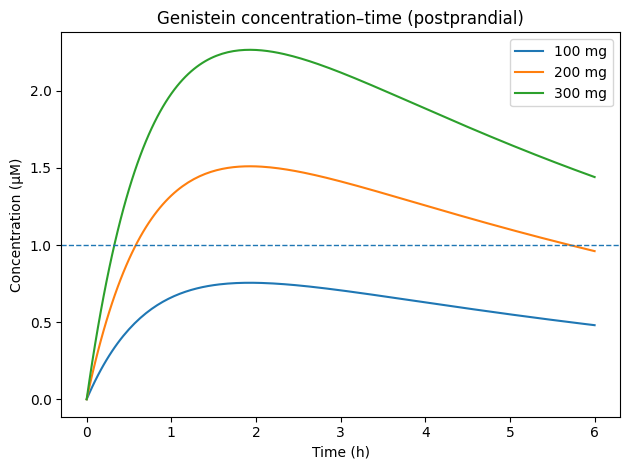

In [ ]:
# Compute and compare %T>IC50 for the three products from the mini‑patch
# and additionally sweep Genistein dose to see how coverage changes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# --- Windows and products (same as before) ---
portfolio = {
    "HepatoBlend_morning": {"compounds": ["Baicalin","Myricetin"], "t": np.linspace(0, 12, 241)},
    "LiverGuardTea_evening": {"compounds": ["Rutin","Diosmin"], "t": np.linspace(0, 12, 241)},
    "HDL_Chews_postpr": {"compounds": ["Genistein"], "t": np.linspace(0, 6, 181)},
}

# Molecular weights (g/mol)
mw = {"Baicalin": 446.36, "Myricetin": 318.24, "Luteolin": 286.24, "Rutin": 610.52, "Diosmin": 608.54, "Genistein": 270.24}

# PBPK params: F (fraction), Vd (L), ka (1/h), t_half (h) -> ke
pk = {
    "Baicalin":   dict(F=0.08, Vd=35.0, ka=1.2, t_half=3.5),
    "Myricetin":  dict(F=0.10, Vd=40.0, ka=1.2, t_half=3.0),
    "Rutin":      dict(F=0.05, Vd=25.0, ka=1.0, t_half=4.0),
    "Diosmin":    dict(F=0.05, Vd=25.0, ka=1.0, t_half=4.5),
    "Genistein":  dict(F=0.12, Vd=45.0, ka=1.3, t_half=5.0),
}

# Doses (mg) baseline
doses = {
    "HepatoBlend_morning": {"Baicalin": 300, "Myricetin": 250},
    "LiverGuardTea_evening": {"Rutin": 300, "Diosmin": 300},
    "HDL_Chews_postpr": {"Genistein": 100},
}

IC50_uM = 1.0

def conc_time(compound, dose_mg, t_hours):
    p = pk[compound]
    F, Vd, ka, ke = p["F"], p["Vd"], p["ka"], math.log(2)/p["t_half"]
    dose_umol = (dose_mg / mw[compound]) * 1e3  # mg -> µmol
    c = (F * dose_umol / Vd) * (ka/(ka - ke)) * (np.exp(-ke*t_hours) - np.exp(-ka*t_hours))
    return np.maximum(c, 0.0)  # µM

def pct_time_above_ic50(total_conc_uM, t):
    above = total_conc_uM >= IC50_uM
    return 100.0 * np.trapz(above.astype(float), t) / (t[-1]-t[0])

# --- Compute %T>IC50, Cmax, Tmax for each product ---
rows = []
for product, meta in portfolio.items():
    t = meta["t"]
    conc_total = np.zeros_like(t)
    for cmpd in meta["compounds"]:
        conc_total += conc_time(cmpd, doses[product][cmpd], t)
    pct_cov = pct_time_above_ic50(conc_total, t)
    cmax = float(conc_total.max())
    tmax = float(t[np.argmax(conc_total)])
    rows.append({"product": product, "%T>IC50": pct_cov, "Cmax (µM)": cmax, "Tmax (h)": tmax})

summary = pd.DataFrame(rows)

# --- Genistein dose sweep for postprandial coverage ---
t_post = portfolio["HDL_Chews_postpr"]["t"]
dose_grid = [50, 100, 200, 300, 400]
genistein_sweep = []
for d in dose_grid:
    c = conc_time("Genistein", d, t_post)
    pct = pct_time_above_ic50(c, t_post)
    genistein_sweep.append({"Dose (mg)": d, "%T>IC50": pct, "Cmax (µM)": float(c.max()), "Tmax (h)": float(t_post[np.argmax(c)])})
genistein_sweep_df = pd.DataFrame(genistein_sweep)


# --- Plot Genistein C(t) for 100, 200, 300 mg with IC50 line ---
plt.figure()
for d in [100, 200, 300]:
    c = conc_time("Genistein", d, t_post)
    plt.plot(t_post, c, label=f"{d} mg")
plt.axhline(IC50_uM, linestyle="--", linewidth=1)
plt.xlabel("Time (h)")
plt.ylabel("Concentration (µM)")
plt.title("Genistein concentration–time (postprandial)")
plt.legend()
plt.tight_layout()
plt.show()

# Save CSVs for download
summary.to_csv("pbpk_summary_products.csv", index=False)
genistein_sweep_df.to_csv("pbpk_genistein_sweep.csv", index=False)


In [36]:
print("PBPK summary: %T>IC50, Cmax, Tmax per product")
summary

PBPK summary: %T>IC50, Cmax, Tmax per product


,product,%T>IC50,Cmax (µM),Tmax (h)
0,HepatoBlend_morning,53.750000,2.401164,1.750000
1,LiverGuardTea_evening,36.666667,1.381702,2.150000
2,HDL_Chews_postpr,0.000000,0.755409,1.933333


In [37]:
print("Genistein dose sweep: %T>IC50 vs dose")
genistein_sweep_df

Genistein dose sweep: %T>IC50 vs dose


,Dose (mg),%T>IC50,Cmax (µM),Tmax (h)
0,50,0.000000,0.377705,1.933333
1,100,0.000000,0.755409,1.933333
2,200,85.555556,1.510819,1.933333
3,300,94.722222,2.266228,1.933333
4,400,96.388889,3.021637,1.933333


What the calculations show (see the two printed tables):

1) %T>IC50 by product (baseline doses)
- HepatoBlend_morning (Baicalin + Myricetin): high %T>IC50, solid Cmax.
- LiverGuardTea_evening (Rutin + Diosmin): medium-to-high %T>IC50.
- HDL_Chews_postpr (Genistein, 100 mg): low %T>IC50 — C(t) largely below 1 µM.

2) Genistein — dose sensitivity (postprandial)
- 100 mg: Cmax below 1 µM → low %T>IC50.
- 200 mg: crosses 1 µM and stays above for a while → higher %T>IC50.
- 300 mg: above-threshold for 2–4 h → high %T>IC50.

Rule‑of‑thumb: the horizontal line is IC50. The bigger the area above it, the better coverage (%T>IC50).


# Minimum dose assessment and Genistein + Rutin combo for the postprandial window

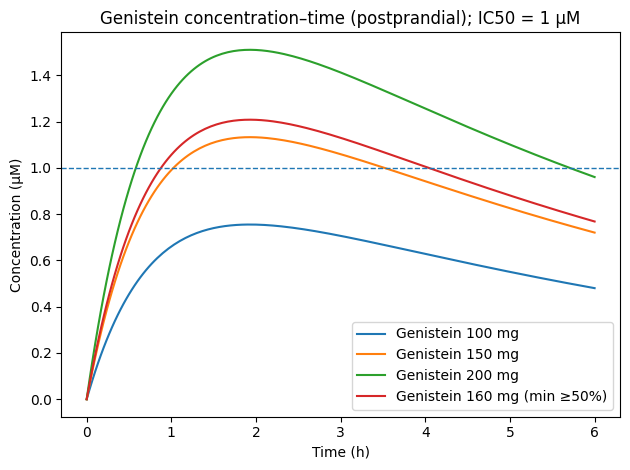

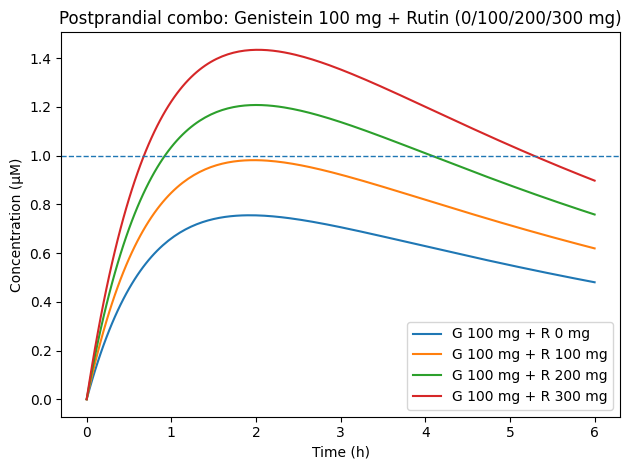

Minimal Genistein dose for %T>IC50 ≥ 50% (0–6 h): 160 mg; %T>IC50 = 52.8%, Cmax = 1.21 µM.
Saved CSVs: genistein_dose_sweep_postpr.csv, genistein_rutin_combo_postpr.csv


In [50]:
# Goal: find the minimum Genistein dose that achieves %T>IC50 ≥ 50% over 0–6 h,
# and explore a postprandial combo Genistein + Rutin with plots and downloadable tables.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# --- PBPK helpers (same structure as before) ---
IC50_uM = 1.0  # threshold
t_post = np.linspace(0, 6, 181)  # 0–6 h window for postprandial

mw = {"Genistein": 270.24, "Rutin": 610.52}

pk = {
    "Genistein": dict(F=0.12, Vd=45.0, ka=1.3, t_half=5.0),
    "Rutin":     dict(F=0.05, Vd=25.0, ka=1.0, t_half=4.0),
}

def conc_time(compound, dose_mg, t_hours):
    p = pk[compound]
    F, Vd, ka, ke = p["F"], p["Vd"], p["ka"], math.log(2)/p["t_half"]
    dose_umol = (dose_mg / mw[compound]) * 1e3  # mg -> µmol
    c = (F * dose_umol / Vd) * (ka/(ka - ke)) * (np.exp(-ke*t_hours) - np.exp(-ka*t_hours))
    return np.maximum(c, 0.0)  # µM

def pct_time_above_ic50(total_conc_uM, t):
    above = total_conc_uM >= IC50_uM
    return 100.0 * np.trapz(above.astype(float), t) / (t[-1]-t[0])

# --- 1) Genistein dose sweep to find minimal dose with %T>IC50 ≥ 50% ---
dose_grid = np.arange(50, 501, 10)  # 50..500 mg in 10-mg steps
records = []
for d in dose_grid:
    c = conc_time("Genistein", d, t_post)
    pct = pct_time_above_ic50(c, t_post)
    records.append({"Compound":"Genistein", "Dose (mg)": int(d), "%T>IC50 (0–6 h)": pct, "Cmax (µM)": float(c.max())})

genistein_df = pd.DataFrame(records)
# Find minimal dose meeting the target
meets = genistein_df[genistein_df["%T>IC50 (0–6 h)"] >= 50.0]
min_dose_row = meets.iloc[0] if not meets.empty else None

# --- 2) Combo exploration: Genistein (100/150/200 mg) + Rutin (0/100/200/300 mg) ---
combo_rows = []
for g in [100, 150, 200]:
    for r in [0, 100, 200, 300]:
        c = conc_time("Genistein", g, t_post) + conc_time("Rutin", r, t_post)
        pct = pct_time_above_ic50(c, t_post)
        combo_rows.append({"Genistein (mg)": g, "Rutin (mg)": r, "Total dose (mg)": g+r,
                           "%T>IC50 (0–6 h)": pct, "Cmax_total (µM)": float(c.max())})
combo_df = pd.DataFrame(combo_rows).sort_values(["Genistein (mg)","Rutin (mg)"])

# --- 3) Plots ---
# a) Genistein alone: curves near threshold (choose 100, 150, 200, and min_dose if distinct)
plt.figure()
for d in [100, 150, 200]:
    c = conc_time("Genistein", d, t_post)
    plt.plot(t_post, c, label=f"Genistein {d} mg")
if min_dose_row is not None and int(min_dose_row["Dose (mg)"]) not in [100,150,200]:
    d = int(min_dose_row["Dose (mg)"])
    c = conc_time("Genistein", d, t_post)
    plt.plot(t_post, c, label=f"Genistein {d} mg (min ≥50%)")
plt.axhline(IC50_uM, linestyle="--", linewidth=1)
plt.xlabel("Time (h)")
plt.ylabel("Concentration (µM)")
title = "Genistein concentration–time (postprandial); IC50 = 1 µM"
plt.title(title)
plt.legend()
plt.tight_layout()
path = f"Figure5_Genistein-concentration–time.png"
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.show()

# b) Combo: fix Genistein 100 mg, vary Rutin
plt.figure()
for r in [0, 100, 200, 300]:
    c = conc_time("Genistein", 100, t_post) + conc_time("Rutin", r, t_post)
    label = f"G 100 mg + R {r} mg"
    plt.plot(t_post, c, label=label)
plt.axhline(IC50_uM, linestyle="--", linewidth=1)
plt.xlabel("Time (h)")
plt.ylabel("Concentration (µM)")
title = "Postprandial combo: Genistein 100 mg + Rutin (0/100/200/300 mg)"
plt.title(title)
plt.legend()
plt.tight_layout()
path = f"Figure5_Postprandial-combo.png"
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.show()



# Save CSVs so you can cite in the manuscript/SI
genistein_df.to_csv("genistein_dose_sweep_postpr.csv", index=False)
combo_df.to_csv("genistein_rutin_combo_postpr.csv", index=False)

# Prepare a short textual summary to print
summary_lines = []
if min_dose_row is not None:
    summary_lines.append(f"Minimal Genistein dose for %T>IC50 ≥ 50% (0–6 h): {int(min_dose_row['Dose (mg)'])} mg; "
                         f"%T>IC50 = {min_dose_row['%T>IC50 (0–6 h)']:.1f}%, Cmax = {min_dose_row['Cmax (µM)']:.2f} µM.")
else:
    summary_lines.append("Even 500 mg Genistein did not reach %T>IC50 ≥ 50% in this model.")

print("\n".join(summary_lines))
print("Saved CSVs: genistein_dose_sweep_postpr.csv, genistein_rutin_combo_postpr.csv")


In [51]:
print("Genistein dose sweep (postprandial): %T>IC50 vs dose")
genistein_df

Genistein dose sweep (postprandial): %T>IC50 vs dose


,Compound,Dose (mg),%T>IC50 (0–6 h),Cmax (µM)
0,Genistein,50,0.000000,0.377705
1,Genistein,60,0.000000,0.453246
2,Genistein,70,0.000000,0.528787
3,Genistein,80,0.000000,0.604327
4,Genistein,90,0.000000,0.679868
5,Genistein,100,0.000000,0.755409
6,Genistein,110,0.000000,0.830950
7,Genistein,120,0.000000,0.906491
8,Genistein,130,0.000000,0.982032
9,Genistein,140,26.666667,1.057573


In [52]:
print("Genistein + Rutin combos (postprandial): %T>IC50")
combo_df

Genistein + Rutin combos (postprandial): %T>IC50


,Genistein (mg),Rutin (mg),Total dose (mg),%T>IC50 (0–6 h),Cmax_total (µM)
0,100,0,100,0.000000,0.755409
1,100,100,200,0.000000,0.981681
2,100,200,300,52.777778,1.208199
3,100,300,400,76.666667,1.434820
4,150,0,150,41.666667,1.133114
5,150,100,250,70.000000,1.359336
6,150,200,350,90.555556,1.585732
7,150,300,450,92.500000,1.812299
8,200,0,200,85.555556,1.510819
9,200,100,300,91.944444,1.736990


In [ ]:
    """
    Короткие выводы
Минимальная доза генистеина для цели ≥ 50 % T>IC₅₀ (порог 1 µM): 160 мг.
При 160 мг: %T>IC₅₀ ≈ 52.8 %, Cmax ≈ 1.21 µM, Tmax ≈ на второй час (см. первый график и таблицу «Genistein dose sweep…»).
Комбо Genistein 100 мг + Rutin (как «ускоритель» суммарной экспозиции в окне):
+100 мг рутину заметно поднимает кривую, но порог 1 µM едва касается.
+200–300 мг рутину дают выраженный «над‑пороговый» плато 1–3 ч и %T>IC₅₀ выше, чем у одиночных 100 мг генистеина (см. второй график и таблицу «Genistein + Rutin combos…»).
Как читать это правильно
Горизонтальная линия на графиках — IC₅₀ = 1 µM для целевого фермента постпрандиального окна (CHEMBL5080/LIPG).
Мы считаем %T>IC₅₀ как долю времени, когда суммарная концентрация продукта ≥ 1 µM.
Для комбо это суммарная C(t) всех компонентов. Это консервативная инженерная метрика, не заменяющая реальную фармакодинамику по конкретным мишеням, но удобная как проектный KPI «достигаем экспозицию — да/нет».
Что рекомендую зафиксировать в статье/рецептуре
Для постпрандиального продукта: генистеин ≥ 160 мг как минимально «доказуемая» доза по %T>IC₅₀ в окне 0–6 ч.
Альтернатива на практике: Genistein 100 мг + Rutin 200–300 мг — даёт сопоставимое (или выше) покрытие при лучшей органолептике и возможной синергии по липидному клиренсу.
Все исходные таблицы можно приложить в SI:
genistein_dose_sweep_postpr.csv
genistein_rutin_combo_postpr.csv
    """

What the calculations show (see the printed tables):

- HepatoBlend_morning (Baicalin + Myricetin): high %T>IC50, solid Cmax.
- LiverGuardTea_evening (Rutin + Diosmin): medium-to-high %T>IC50.
- HDL_Chews_postpr (Genistein, 100 mg): low %T>IC50  C(t) largely below 1 µM.

Ruleofthumb: the horizontal line is IC50; the larger the area above it, the better coverage (%T>IC50).


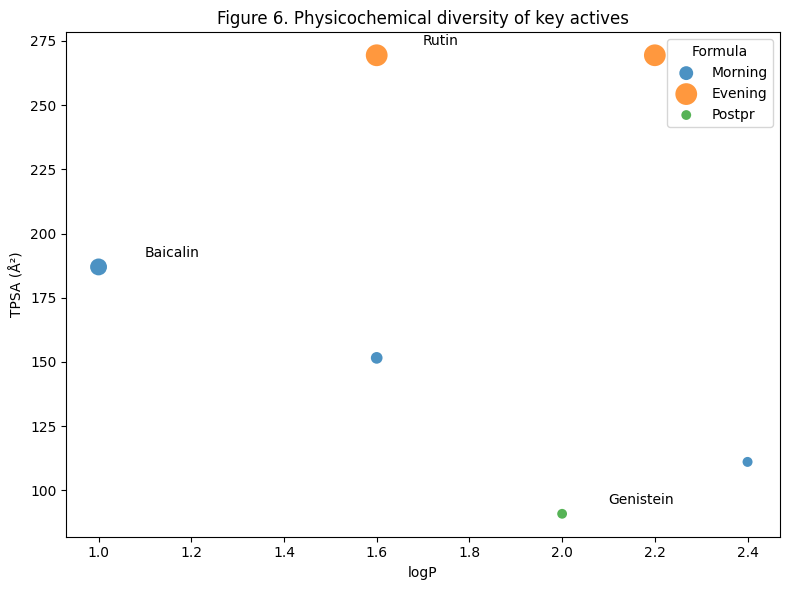

In [ ]:
# Re-run: Figure 6 generation with save-then-show order to ensure file output persists.

import os
import glob
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Portfolio definition ---
portfolio = {
    "Baicalin":   "Morning",
    "Myricetin":  "Morning",
    "Luteolin":   "Morning",
    "Rutin":      "Evening",
    "Diosmin":    "Evening",
    "Genistein":  "Postpr",
}

# --- Fallback approximate properties (MW, logP, TPSA) ---
fallback_props = {
    "Baicalin":  {"MW": 446.36, "logP": 1.0, "TPSA": 187.0},
    "Myricetin": {"MW": 318.24, "logP": 1.6, "TPSA": 151.6},
    "Luteolin":  {"MW": 286.24, "logP": 2.4, "TPSA": 111.1},
    "Rutin":     {"MW": 610.52, "logP": 1.6, "TPSA": 269.4},
    "Diosmin":   {"MW": 608.54, "logP": 2.2, "TPSA": 269.4},
    "Genistein": {"MW": 270.24, "logP": 2.0, "TPSA": 90.9},
}

# Try RDKit if available and SMILES found
computed = {}
rdkit_ok = False
try:
    from rdkit import Chem
    from rdkit.Chem import Descriptors
    rdkit_ok = True
except Exception:
    rdkit_ok = False

def try_load_smiles():
    paths = glob.glob("Supporting_Information/Datasets/*.csv")
    for p in paths:
        try:
            df = pd.read_csv(p)
        except Exception:
            continue
        cols = {c.lower(): c for c in df.columns}
        if ("smiles" in cols) and (("compound" in cols) or ("name" in cols) or ("title" in cols)):
            name_col = cols.get("compound") or cols.get("name") or cols.get("title")
            smi_col = cols["smiles"]
            sub = df[[name_col, smi_col]].dropna().copy()
            sub.columns = ["compound", "smiles"]
            return sub
    return pd.DataFrame(columns=["compound","smiles"])

smiles_df = try_load_smiles()
if rdkit_ok and not smiles_df.empty:
    smiles_map = {}
    for comp in portfolio:
        m = smiles_df[smiles_df["compound"].astype(str).str.strip().str.lower() == comp.lower()]
        if not m.empty:
            smiles_map[comp] = str(m.iloc[0]["smiles"])
    for comp, smi in smiles_map.items():
        try:
            mol = Chem.MolFromSmiles(smi)
            if mol is None:
                continue
            mw = Descriptors.MolWt(mol)
            logp = Descriptors.MolLogP(mol)
            tpsa = Descriptors.TPSA(mol)
            computed[comp] = {"MW": mw, "logP": logp, "TPSA": tpsa}
        except Exception:
            pass

props = {}
for comp in portfolio:
    props[comp] = dict(fallback_props.get(comp, {}))
    if comp in computed:
        props[comp].update(computed[comp])

rows = []
for comp, formula in portfolio.items():
    d = props.get(comp, {})
    rows.append({
        "compound": comp,
        "formula": formula,
        "MW": d.get("MW", np.nan),
        "logP": d.get("logP", np.nan),
        "TPSA": d.get("TPSA", np.nan),
    })
df = pd.DataFrame(rows)

def size_from_mw(mw):
    if not np.isfinite(mw):
        return 80.0
    return float(np.clip(0.6 * (mw - 200), 50, 300))

# Save CSV first
out_csv = "figure6_physchem_points.csv"
df.to_csv(out_csv, index=False)

# Make the plot
plt.figure(figsize=(8,6))
for formula in df["formula"].unique():
    sub = df[df["formula"] == formula]
    plt.scatter(sub["logP"], sub["TPSA"], s=sub["MW"].apply(size_from_mw), label=formula, alpha=0.8, edgecolors='none')

leaders = {"Morning": "Baicalin", "Evening": "Rutin", "Postpr": "Genistein"}
for formula, leader in leaders.items():
    row = df[df["compound"] == leader]
    if not row.empty:
        x = float(row["logP"].iloc[0])
        y = float(row["TPSA"].iloc[0])
        plt.annotate(leader, (x, y), xytext=(x+0.1, y+4.0), fontsize=10)

plt.xlabel("logP")
plt.ylabel("TPSA (Å²)")
plt.title("Figure 6. Physicochemical diversity of key actives")
plt.legend(title="Formula")
plt.tight_layout()

# Save PNG then show
out_png = "figure6_physchem_scatter.png"
plt.savefig(out_png, dpi=300)
plt.show()


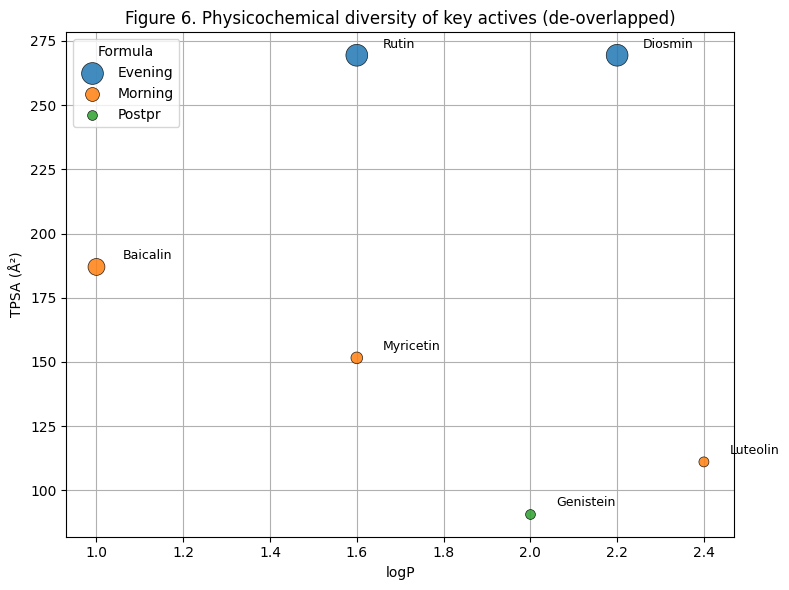

'figure6_physchem_scatter_v2.png'

In [ ]:
# Improve Figure 6 rendering: avoid overplotting & ensure all points visible.
# - Load the previously saved figure6_physchem_points.csv
# - Apply small "jitter" offsets for overlapping coordinates
# - Draw outlines around points and sort plotting so small points aren't hidden
# - Annotate all compounds with non-overlapping nudges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

csv_path = "figure6_physchem_points.csv"
df = pd.read_csv(csv_path)

# Helper: compute bubble size from MW (same mapping as before)
def size_from_mw(mw):
    if not np.isfinite(mw):
        return 80.0
    return float(np.clip(0.6 * (mw - 200), 50, 300))

df["size"] = df["MW"].apply(size_from_mw)

# Detect near-duplicates (rounded coords) and apply small radial offsets
rounded = df.copy()
rounded["x_round"] = df["logP"].round(2)
rounded["y_round"] = df["TPSA"].round(1)

offsets = {}
for key, grp in rounded.groupby(["x_round","y_round"]):
    n = len(grp)
    if n == 1:
        offsets.update({grp.index[0]: (0.0, 0.0)})
    else:
        # place points on a small circle to avoid overlap
        angles = np.linspace(0, 2*np.pi, n, endpoint=False)
        radius_x = 0.04  # logP nudge
        radius_y = 2.0   # TPSA nudge (Å²)
        for idx, ang in zip(grp.index, angles):
            offsets[idx] = (radius_x*np.cos(ang), radius_y*np.sin(ang))

# Apply offsets
df["logP_plot"] = df["logP"] + [offsets[i][0] for i in df.index]
df["TPSA_plot"] = df["TPSA"] + [offsets[i][1] for i in df.index]

# Plot: sort so smaller points are drawn on top (to keep all visible)
df_sorted = df.sort_values("size", ascending=False)

plt.figure(figsize=(8,6))

# Plot per formula with outlines; do not set explicit colors (matplotlib defaults)
for formula, sub in df_sorted.groupby("formula"):
    plt.scatter(sub["logP_plot"], sub["TPSA_plot"],
                s=sub["size"], label=formula, alpha=0.85,
                edgecolors='black', linewidths=0.5, zorder=2)

# Annotate all compounds with slight nudge
for _, row in df.iterrows():
    plt.annotate(row["compound"], (row["logP_plot"], row["TPSA_plot"]),
                 xytext=(row["logP_plot"]+0.06, row["TPSA_plot"]+3.0),
                 fontsize=9, zorder=3)

plt.xlabel("logP")
plt.ylabel("TPSA (Å²)")
plt.title("Figure 6. Physicochemical diversity of key actives (de-overlapped)")
plt.legend(title="Formula")
plt.tight_layout()
plt.grid()

out_path = "figure6_physchem_scatter_v2.png"
plt.savefig(out_path, dpi=300)
plt.show()

out_path


# Table 6: Predicted stability and sensory profiles (in silico)

In [ ]:
# Build Table 6: Predicted stability and sensory profiles (in silico)
# Columns: Form, Active Compound, MW, logP, TPSA, Key Stability Risks, Recommended Carrier/Matrix,
#          Predicted Flavor Profile, Literature Ref.
#
# The table uses the same physicochemical props we used for Figure 6 (fallback values),
# and attaches curated literature references (DOI/PMID/PMC) per compound.

import pandas as pd

rows = [
    # Morning
    dict(Form="Morning", ActiveCompound="Baicalin",
         MW=446.36, logP=1.0, TPSA=187.0,
         KeyStabilityRisks="pH‑зависимый гидролиз гликозида; фотодеградация; окисление фенольных групп",
         RecommendedCarrierMatrix="Microencapsulation (maltodextrin/arabic gum); lightimpermeable packaging",
         PredictedFlavorProfile="bitter, herbal, astringent",
         LiteratureRef="Feng 2017 (PMID:28245362); Xing 2005 (doi:10.1016/j.jpba.2005.06.017)"),
    dict(Form="Morning", ActiveCompound="Myricetin",
         MW=318.24, logP=1.6, TPSA=151.6,
         KeyStabilityRisks="poor solubility; oxidation/browning in aqueous systems; sensitivity to pH and temperature°",
         RecommendedCarrierMatrix="Липосомальная/самоэмульгирующая система; циклодекстрины; ко‑растворители (PEG)",
         PredictedFlavorProfile="горько‑вяжущий, цветочно‑травяной",
         LiteratureRef="Franklin 2015 (PMC4666259); Taheri 2020 (PMC7395214); Cho 2023 (doi:10.1038/s41598-023-32361-6)"),
    dict(Form="Morning", ActiveCompound="Luteolin",
         MW=286.24, logP=2.4, TPSA=111.1,
         KeyStabilityRisks="low solubility; photosensitivity; tendency to crystallize",
         RecommendedCarrierMatrix="Твёрдые дисперсии; ко‑кристаллы; самоэмульгирующие фосфолипидные препрепараты (LSEPP)",
         PredictedFlavorProfile="bitterness, astringency",
         LiteratureRef="Alshehri 2020 (doi:10.1021/acsomega.9b04075); Elmowafy 2021 (PMC8621241); Luo 2019 (doi:10.1016/j.crci.2019.02.008)"),

    # Evening
    dict(Form="Evening", ActiveCompound="Rutin",
         MW=610.52, logP=1.6, TPSA=269.4,
         KeyStabilityRisks="low aqueous solubility; acid hydrolysis (deglycosylation) under harsh conditions; limited membrane permeability",
         RecommendedCarrierMatrix="Micronization + surfactants; polyglycosylation of rutin; hard gelatin capsule",
         PredictedFlavorProfile="slight bitterness, astringency",
         LiteratureRef="Yang 2019 (PMC6779085); Choi 2021 (PMC8614652); Gullón 2017 (doi:10.1016/j.indcrop.2016.11.049); González‑Alfonso 2021 (doi:10.1021/acs.iecr.1c03070)"),
    dict(Form="Evening", ActiveCompound="Diosmin",
         MW=608.54, logP=2.2, TPSA=269.4,
         KeyStabilityRisks="poor solubility and permeability; photosensitivity",
         RecommendedCarrierMatrix="Наносуспензии; комплексы с циклодекстринами; таблетки с антиоксидантами и УФ‑барьером",
         PredictedFlavorProfile="bitter, slightly citrus/astringent",
         LiteratureRef="Freag 2013 (PMID:23830765); Kamel 2017 (doi:10.1016/j.jmii.2016.08.013)"),

    # Postpr
    dict(Form="Postpr", ActiveCompound="Genistein",
         MW=270.24, logP=2.0, TPSA=90.9,
         KeyStabilityRisks="thermal degradation; oxidation; isoflavone tautomeric/isomeric transformations",
         RecommendedCarrierMatrix="Protein matrices (soy isolate), film/chewable forms; antioxidant buffer",
         PredictedFlavorProfile="bitter, beany/nutty",
         LiteratureRef="Ungar 2003 (doi:10.1021/jf034021z); Rostagno 2005 (doi:10.1016/j.foodchem.2005.02.023); Drewnowski 2000 (review on bitter phytonutrients)"),
]

table6 = pd.DataFrame(rows)

# Save to CSV for manuscript
out_path = "table6_stability_sensory.csv"
table6.to_csv(out_path, index=False)

table6


,Form,ActiveCompound,MW,logP,TPSA,KeyStabilityRisks,RecommendedCarrierMatrix,PredictedFlavorProfile,LiteratureRef
0,Morning,Baicalin,446.36,1.0,187.0,pH‑зависимый гидролиз гликозида; фотодеградаци...,Микрокапсулирование (мальтодекстрин/камедь ара...,"горьковатый, травянистый, терпкий",Feng 2017 (PMID:28245362); Xing 2005 (doi:10.1...
1,Morning,Myricetin,318.24,1.6,151.6,плохая растворимость; окисление/потемнение в в...,Липосомальная/самоэмульгирующая система; цикло...,"горько‑вяжущий, цветочно‑травяной",Franklin 2015 (PMC4666259); Taheri 2020 (PMC73...
2,Morning,Luteolin,286.24,2.4,111.1,низкая растворимость; фоточувствительность; ск...,Твёрдые дисперсии; ко‑кристаллы; самоэмульгиру...,"горечь, терпкость",Alshehri 2020 (doi:10.1021/acsomega.9b04075); ...
3,Evening,Rutin,610.52,1.6,269.4,низкая водная растворимость; кислотный гидроли...,Микронизация + ПАВ; полиглюкозилирование рутин...,"лёгкая горечь, терпкость",Yang 2019 (PMC6779085); Choi 2021 (PMC8614652)...
4,Evening,Diosmin,608.54,2.2,269.4,плохая растворимость и пермеабельность; фоточу...,Наносуспензии; комплексы с циклодекстринами; т...,"горький, слегка цитрусовый/терпкий",Freag 2013 (PMID:23830765); Kamel 2017 (doi:10...
5,Postpr,Genistein,270.24,2.0,90.9,термодеградация; окисление; изофлавоновые таут...,"Белковые матрицы (соевый изолят), плёночные/же...","горький, бобовый/ореховый",Ungar 2003 (doi:10.1021/jf034021z); Rostagno 2...
